# **Data Understanding**

In this notebook we will explore in details the two given datasets to better understand the data before doing the other assigned tasks.

In [1837]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils import *

## **Cyclists Dataset**

We start from the cyclists dataset. We load it and then we explore it in details.

In [1838]:
cyclists_df = pd.read_csv('../dataset/cyclists.csv')
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


We split the catgorical and numerical columns. Will be useful later.

In [1839]:
# Define categorical and numerical columns of cyclists dataset
cyclists_numeric = ["birth_year", "height", "weight"]
cyclists_categorical = ["nationality"]

### **Basic Checks**

#### Attributes Type

First we check if there are some anomalies in the data types of the attributes.

In [1840]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


From an initial check there are no particular anomalies in the attribute types.

#### **Non-Null Values Check**

We proceed to check if there are missing values in the dataset.

In [1841]:
cyclists_df.isnull().any()

_url           False
name           False
birth_year      True
weight          True
height          True
nationality     True
dtype: bool

We plot a histogram showing how many null values there are for each attribute to get a more clear view.

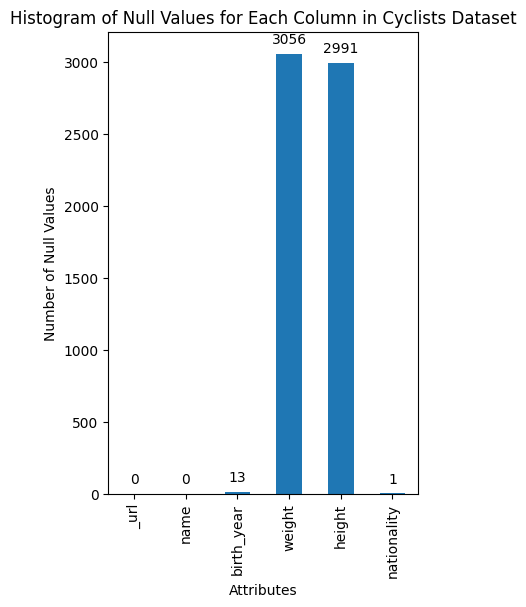

In [1842]:
# Calculate the number of null values for each column
null_counts = cyclists_df.isnull().sum()

# Plot the histogram
null_counts.plot(kind='bar', figsize=(4, 6), title='Histogram of Null Values for Each Column in Cyclists Dataset')
plt.xlabel('Attributes')
plt.ylabel('Number of Null Values')

# Add y values over the columns
for i, v in enumerate(null_counts):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()

The attributes with the most null values are ```weight``` and ```height```. Below we plot the heatmap of the null values to obtain another view of the missing values.

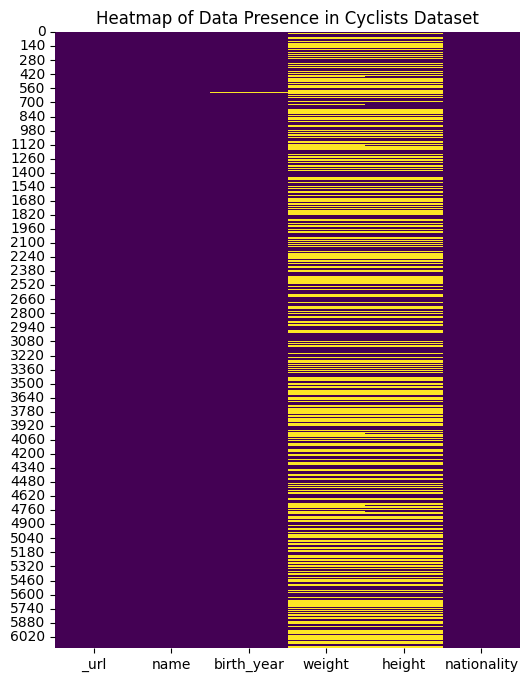

In [1843]:
# Heatmap of the presence of data in the cyclists_df dataset
plt.figure(figsize=(6, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

### **Basic Statistics**

In [1844]:
cyclists_df[cyclists_numeric].describe()

,birth_year,height,weight
count,6121.000000,3143.000000,3078.000000
mean,1974.071884,179.815145,68.658739
std,15.535834,6.443447,6.348183
min,1933.000000,154.000000,48.000000
25%,1962.000000,175.000000,64.000000
50%,1974.000000,180.000000,69.000000
75%,1987.000000,184.000000,73.000000
max,2004.000000,204.000000,94.000000


We briefly validate the min/max values querying the web to check if they are correct.

In [1845]:
print('Min values corresponding cyclists:')
print(f'- {cyclists_df[cyclists_df["birth_year"] == 1933]["name"].values[0]} was born in 1933')
print(f'- {cyclists_df[cyclists_df["height"] == 154]["name"].values[0]} was tall 154 cm')
print(f'- {cyclists_df[cyclists_df["weight"] == 48]["name"].values[0]} weighted 48 kg')

print()

print('Max values corresponding cyclists:')
print(f'- {cyclists_df[cyclists_df["birth_year"] == 2004]["name"].values[0]} was born in 2004')
print(f'- {cyclists_df[cyclists_df["height"] == 204]["name"].values[0]} was tall 204 cm')
print(f'- {cyclists_df[cyclists_df["weight"] == 94]["name"].values[0]} weighted 94 kg')

Min values corresponding cyclists:
- Rik Van Looy was born in 1933
- Vicente  Belda was tall 154 cm
- José Humberto  Rujano weighted 48 kg

Max values corresponding cyclists:
- Joshua  Tarling was born in 2004
- Conor  Dunne was tall 204 cm
- Magnus  Bäckstedt weighted 94 kg


All of this data are real according to the web.

### **Columns Analysis**

#### ```_url``` column


This categorical column contains the unique URL identifier of a cyclist. As we can see after a simple check, the 6134 total values are unique: there are no duplicates in the column nor null values.

In [1846]:
print(cyclists_df['_url'].duplicated().sum(), 'duplicates found')


0 duplicates found


In [1847]:
cyclists_df['_url'].isnull().sum()

np.int64(0)

#### ```name``` column

It is a categorical column containing the name of a cyclist. As we can see by a first check, there are 7 duplicates in the column. So we analyze them in details.

In [1848]:
print(cyclists_df['name'].duplicated().sum(), 'duplicates found')

7 duplicates found


In [1849]:
# Filter the dataframe to get the cyclists with duplicate names
duplicate_names_df = cyclists_df[cyclists_df.duplicated(subset='name', keep=False)]
duplicate_names_df = duplicate_names_df.sort_values(by='name')
duplicate_names_df[['name', '_url']]

,name,_url
2953,Alberto Fernández,alberto-fernandez-sainz
5720,Alberto Fernández,alberto-fernandez-blanco
2235,Alessandro Pozzi,alessandro-pozzi2
5722,Alessandro Pozzi,alessandro-pozzi
347,Andrea Peron,andrea-peron-1
2682,Andrea Peron,andrea-peron
2862,Antonio Cabello,antonio-cabello-baena
3238,Antonio Cabello,antonio-cabello
2939,Jesús López,jesus-lopez23
5040,Jesús López,jesus-lopez-carril


Since the ```_url_``` values are unique we exclude that there are duplicates. Indeed, by visualising which duplicates are in the ```name``` column and their associated ```_url_``` values, we can assume that they are different people since, for istance, ```Sergio Domínguez``` is associated to ```sergio-dominguez-rodriguez``` and ```sergio-dominguez-munoz``` which are two existent and different cyclists. 

In this example, therefore, the value in the name column is simply a shortened name that is associated with two different cyclists. In case the "extended name" is the same, we can see that the ```_url_``` value contains a number in the tail to identify the two different cyclists. For example, ```Alessandro Pozzi``` or ```Andrea Peron``` are associated respectively with ```alessandro-pozzi```, ```alessandro-pozzi2``` and ```andrea-peron```, ```andrea-peron-1```. 

In [1850]:
cyclists_df[cyclists_df['name'].isin(['Andrea  Peron', 'Alessandro  Pozzi'])]

,_url,name,birth_year,weight,height,nationality
347,andrea-peron-1,Andrea Peron,1971.0,70.0,183.0,Italy
2235,alessandro-pozzi2,Alessandro Pozzi,1969.0,NaN,NaN,Italy
2682,andrea-peron,Andrea Peron,1988.0,70.0,178.0,Italy
5722,alessandro-pozzi,Alessandro Pozzi,1954.0,NaN,NaN,Italy


Again, an online search allowed us to verify that these are four different people and validate the data associated with them. 

Apparently no standard is used in the ```_url``` values to mark two different cyclists. For example, there are two cyclists in the dataset:```Jesús López Carril``` (1949) and ```Jesús López Soriano``` (1955). For the first one, the ```_url``` is ```jesus-lopez-carril``` as expected. For the second one we would have expected an ```_url``` value like ```jesus-lopez-soriano```, instead it is ```jesus-lopez23```

In [1851]:
cyclists_df[cyclists_df['name'] == 'Jesús  López']

,_url,name,birth_year,weight,height,nationality
2939,jesus-lopez23,Jesús López,1955.0,NaN,NaN,Spain
5040,jesus-lopez-carril,Jesús López,1949.0,NaN,NaN,Spain


After checking these values online, we can confirm that they are all different people. 

#### ```birth_year``` column

This is a numerical attribute indicating the birth year of a cyclist. For obvious reasons duplicates are allowed. We check if there are null values.

In [1852]:
print("Null vlaues in birth year column: ", int(cyclists_df['birth_year'].isnull().sum()))

Null vlaues in birth year column:  13


Since there are only 13 null values we show all the related rows.

In [1853]:
cyclists_df[cyclists_df['birth_year'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,NaN
601,vladimir-malakov,Vladimir Malakov,NaN,NaN,NaN,Russia
894,antonio-zanini,Antonio Zanini,NaN,NaN,NaN,Italy
2408,filippo-simonetti,Filippo Simonetti,NaN,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,NaN,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,NaN,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,NaN,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,NaN,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,NaN,NaN,NaN,Venezuela
4384,javier-luquin,Javier Luquin,NaN,NaN,NaN,Spain


As we can see from the table above, also the ```weight``` and ```height``` values are ```NaN``` when ```birth_year``` is null.

As we previously checked in the basic analysis there are some outliers (extreme values) in the min/max values of  column, already verified (see Basic Statistic section). We also check if in the middle there are some errors in the ```birth_year``` values. 

In [1854]:
cyclists_df['birth_year'].unique()

array([1964., 1965., 1996., 1995., 1997., 1998., 1947., 1988., 1984.,
         nan, 1982., 1980., 1970., 1981., 1985., 1954., 1994., 1951.,
       1973., 1950., 1979., 1957., 1986., 1991., 1974., 1944., 1962.,
       2001., 1978., 1952., 1969., 1968., 1943., 1960., 1972., 1975.,
       1961., 1949., 1966., 1990., 1989., 1983., 1956., 1992., 1999.,
       2002., 1993., 1959., 1948., 1971., 1977., 1987., 1976., 1967.,
       1963., 2000., 1955., 1942., 1940., 2003., 1946., 1945., 1953.,
       1941., 1958., 1933., 1938., 2004., 1939., 1936., 1934., 1937.])

As we can see there are only legal values in the column.

##### Plots

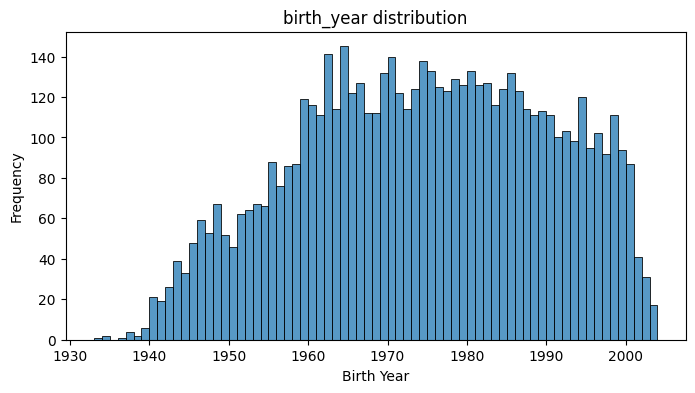

In [1855]:
plt.figure(figsize=(8, 4))
sns.histplot(cyclists_df['birth_year'].dropna(), binwidth=1)
plt.title('birth_year distribution')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of birth years, spanning from around 1930 to the early 2000s. The distribution increases until reaching a peak around 1960-1980, after which there's a gradual decline. The highest frequencies are between the 1950s and the 1980s, showing that we have less informations about earlier cyclists.

Checking below how many cyclist are associated to the extreme values of the ```birth_year``` column, we can see that in the 1933 there is only one cyclist. Instead, there are 5 different cyclist born in the 2004.

In [1856]:
cyclists_df[cyclists_df['birth_year'] == 1933]

,_url,name,birth_year,weight,height,nationality
398,rik-van-looy,Rik Van Looy,1933.0,73.0,178.0,Belgium


In [1857]:
cyclists_df[cyclists_df['birth_year'] == 2004]

,_url,name,birth_year,weight,height,nationality
806,joshua-tarling,Joshua Tarling,2004.0,78.0,194.0,Great Britain
1795,jan-christen,Jan Christen,2004.0,60.0,183.0,Switzerland
3043,rafael-elvas-barbas,Rafael Barbas,2004.0,67.0,189.0,Portugal
3968,tiago-nunes,Tiago Nunes,2004.0,NaN,NaN,Portugal
5684,paul-magnier,Paul Magnier,2004.0,75.0,187.0,France


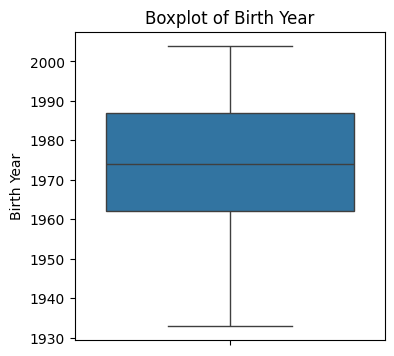

In [1858]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=cyclists_df['birth_year'])
plt.title('Boxplot of Birth Year')
plt.ylabel('Birth Year')
plt.show()

In [1859]:
cyclists_df['birth_year'].describe()

count    6121.000000
mean     1974.071884
std        15.535834
min      1933.000000
25%      1962.000000
50%      1974.000000
75%      1987.000000
max      2004.000000
Name: birth_year, dtype: float64

Overall, the distribution of ```birth_year``` is centered in 1974, with most people being born between 1962 and 1987, and the total range spans from 1933 to 2004. There don't seem to be any outliers as no individual points are plotted outside of the whiskers. We also check and quantify outliers using IQR method.

In [1860]:
count_outliers(cyclists_df['birth_year'])

Number of outliers: 0 over 6121 values using the IQR method


#### ```weight``` column

This is a numerical attribute. Duplicates are allowed for obvious reasons. We check for null values.

In [1861]:
print(f"There are {int(cyclists_df['weight'].isnull().sum())} null values in the 'weight' column.")

There are 3056 null values in the 'weight' column.


In [1862]:
cyclists_df[cyclists_df['weight'].isnull()].sample(25)

,_url,name,birth_year,weight,height,nationality
2944,franck-morelle,Franck Morelle,1964.0,NaN,NaN,France
3166,darren-baker,Darren Baker,1967.0,NaN,NaN,United States
1930,viktor-klimov,Viktor Klimov,1964.0,NaN,NaN,Ukraine
3295,antonio-gonzalez,Antonio González,1954.0,NaN,NaN,Spain
5200,felix-vidal-celis-zabala,Félix Vidal Celis,1982.0,NaN,NaN,Spain
800,filip-cottenies,Filip Cottenies,1962.0,NaN,NaN,Belgium
4513,benoit-sinner,Benoît Sinner,1984.0,NaN,NaN,France
964,jan-jonkers,Jan Jonkers,1955.0,NaN,NaN,Netherlands
1047,jacques-martin,Jacques Martin,1952.0,NaN,NaN,Belgium
4311,mauro-bettin,Mauro Bettin,1968.0,NaN,NaN,Italy


There are 3056 ```NaN``` values for the ```weight``` attribute. By picking a small random sample of the rows where  the ```weight``` attribute is ```NaN``` we notice that also the ```height``` is ```NaN```.

##### Plots

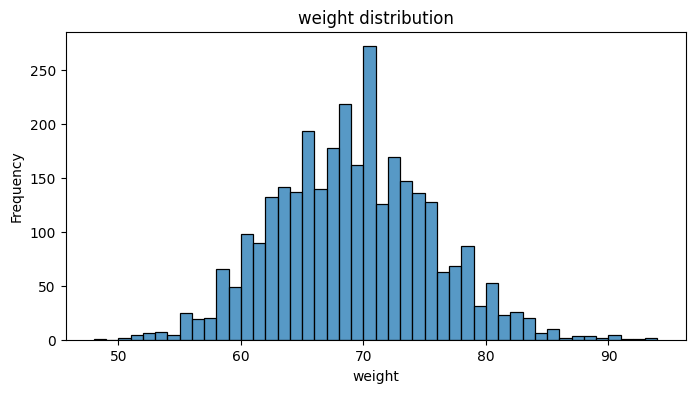

In [1863]:
plt.figure(figsize=(8, 4))
sns.histplot(cyclists_df['weight'].dropna(), binwidth=1)
plt.title('weight distribution')
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.show()

The histogram shows a roughly normal distribution of weights, with the highest frequency centered around 70 kg. Most weights fall between 60 kg and 80 kg, with fewer values in the lower 50s and above 90 kg.

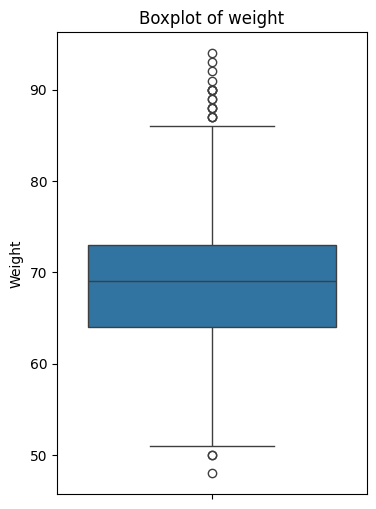

In [1864]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=cyclists_df['weight'])
plt.title('Boxplot of weight')
plt.ylabel('Weight')
plt.show()

In [1865]:
cyclists_df['weight'].describe()

count    3078.000000
mean       68.658739
std         6.348183
min        48.000000
25%        64.000000
50%        69.000000
75%        73.000000
max        94.000000
Name: weight, dtype: float64

The weight distribution is approximately normal, centered around 70 kg. There are a few outliers below 50 kg and above 90 kg. There more outliers are concentrated on the upper whisker. This, together with the other characteristics of the boxplot suggests a little negative skewness. We check how many outliers there are using the IQR method.

In [1866]:
count_outliers(cyclists_df['weight'])

Number of outliers: 19 over 3078 values using the IQR method


#### ```height``` column

This is a numerical attribute. Duplicates are allowed for obvious reasons. We check for null values.

In [1867]:
print(f"There are {int(cyclists_df['height'].isnull().sum())} null values in the 'height' column.")

There are 2991 null values in the 'height' column.


There are 2991 ```NaN``` values for the ```height``` attribute. As mentioned above, it is very likely to find a ```NaN``` in ```height``` column when even ```weight``` is ```NaN```. More precisely there are few cases when one is null and the other not and viceversa:

In [1868]:
# Count where height is null and weight is not
height_null_weight_not_null = cyclists_df[(cyclists_df['height'].isnull()) & (cyclists_df['weight'].notnull())].shape[0]

# Count where weight is null and height is not
weight_null_height_not_null = cyclists_df[(cyclists_df['weight'].isnull()) & (cyclists_df['height'].notnull())].shape[0]

print(f"Rows where height is null and weight is not: {height_null_weight_not_null}")
print(f"Rows where weight is null and height is not: {weight_null_height_not_null}")

Rows where height is null and weight is not: 7
Rows where weight is null and height is not: 72


##### Plots

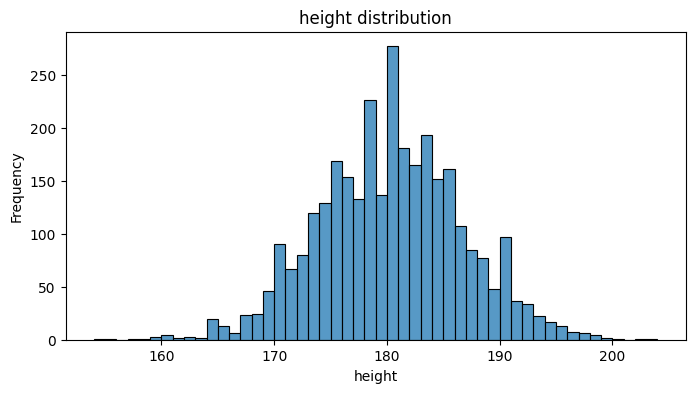

In [1869]:
plt.figure(figsize=(8, 4))
sns.histplot(cyclists_df['height'].dropna(), binwidth=1)
plt.title('height distribution')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()

The histogram is roughly bell-shaped, indicating an approximately normal distribution of heights. The center of the distribution appears to be around 180 cm, suggesting that this is the average height for the cyclists. 

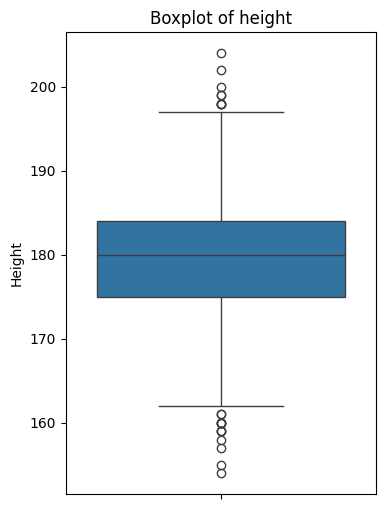

In [1870]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=cyclists_df['height'])
plt.title('Boxplot of height')
plt.ylabel('Height')
plt.show()

In [1871]:
cyclists_df['height'].describe()

count    3143.000000
mean      179.815145
std         6.443447
min       154.000000
25%       175.000000
50%       180.000000
75%       184.000000
max       204.000000
Name: height, dtype: float64

There are some outliers, this time concentrated more or less equally beyond both the whiskers. The boxplot, together with the histogram plotted before, suggest a relatively symmetric distribution of the ```height``` values with a little negative skewness. We check how many outliers there are using IQR method.

In [1872]:
count_outliers(cyclists_df['height'])

Number of outliers: 22 over 3143 values using the IQR method


#### ```nationality``` column

This is a categorical attribute. Duplicates are allowed. We check the presence of null values.

In [1873]:
print(f"There are {int(cyclists_df['nationality'].isnull().sum())} null values in the 'nationality' column.")

There are 1 null values in the 'nationality' column.


Let's see which are the unique values of the column.

In [1874]:
cyclists_df[cyclists_df['nationality'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,NaN


There is only one null value in the ```nationality``` and also ```birth_year```, ```weight```, ```height``` are ```NaN```.

In [1875]:
cyclists_df['nationality'].unique()

array(['Italy', 'France', 'Netherlands', 'Belgium', 'Spain',
       'United States', nan, 'Norway', 'Russia', 'Poland', 'Germany',
       'Australia', 'Switzerland', 'Ireland', 'Denmark', 'Great Britain',
       'Colombia', 'South Africa', 'Argentina', 'New Zealand',
       'Lithuania', 'Portugal', 'Austria', 'Yugoslavia', 'Estonia',
       'Romania', 'Slovenia', 'Canada', 'Latvia', 'Luxembourg', 'Sweden',
       'Czech Republic', 'Slovakia', 'Morocco', 'Ukraine', 'Ethiopia',
       'Belarus', 'Venezuela', 'Japan', 'Mexico', 'Croatia', 'Kazakhstan',
       'Uruguay', 'Israel', 'Namibia', 'Eritrea', 'Costa Rica', 'Taiwan',
       'Azerbaijan', 'Hungary', 'Moldova', 'Panama', 'Finland',
       'Bulgaria', 'Serbia', 'Brazil', 'Iran', 'Greece', 'Chile',
       'Ecuador', 'China', 'Albania', 'Guatemala', 'Uzbekistan',
       'Algeria', 'Tunisia', 'Monaco', 'Rwanda', 'Dominican Republic',
       'Liechtenstein', 'Zimbabwe', 'Puerto Rico', 'Hongkong'],
      dtype=object)

Displaying the unique values of ```nationality``` there are apparently no problematic values in the column. All values are semantically and syntactically correct.

##### Plots

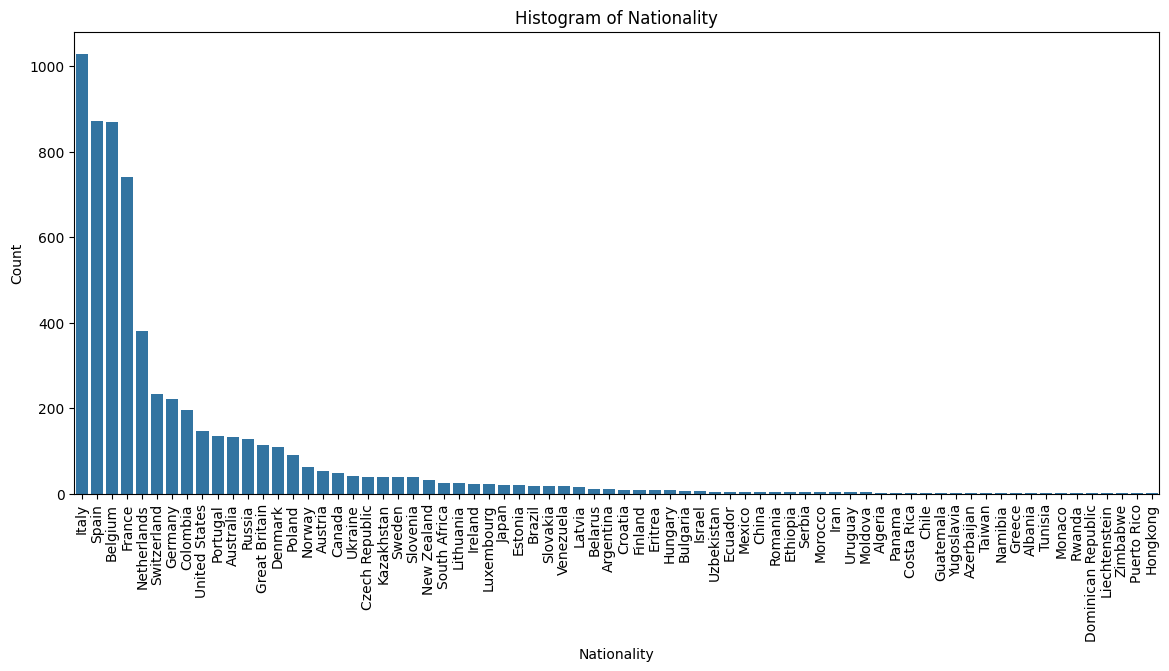

In [2022]:
plt.figure(figsize=(14, 6))
sns.countplot(x='nationality', data=cyclists_df, order=cyclists_df['nationality'].value_counts().index)
plt.title('Histogram of Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

This plot shows that most cyclists are European, predominantly from Italy, Spain, Belgium, and France, followed by a smaller number from Colombia and the USA.

### Correlation Analysis

We check the correlation between the numerical attributes. Since the data are not normally distributed and there are some outliers, we use the Spearman and Kendall correlation also to capture non-linear relationships.

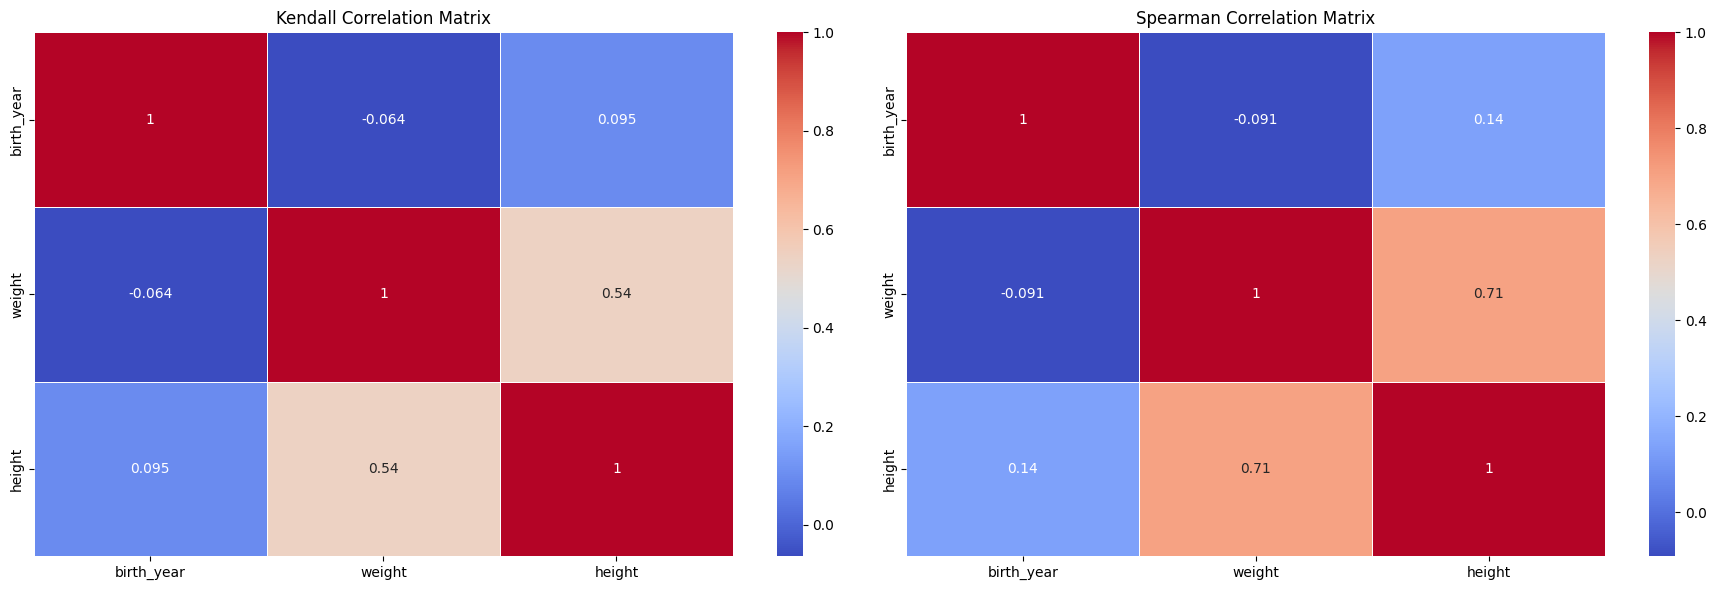

In [1877]:
from utils import center_and_scale, correlations, plot_correlations

normalized_cyclist, normalization_scalers_cyclist = center_and_scale(cyclists_df)
cyclists_corr = correlations(normalized_cyclist, ["kendall", "spearman"])
plot_correlations(cyclists_corr)

As one can expect, the correlation between ```weight``` and ```height``` is high, since they are two parameter usually correlated in the real world. It's interesting to see that both matrices highlight a negative correlation between ```birth_year``` and ```weight```, ```height```. This is probably due to the fact that younger cyclists tend to be lighter and shorter than older ones.

## **Races Dataset**

Now we analyze the second dataset.

In [1878]:
races_df = pd.read_csv('../dataset/races.csv')
races_df.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


We filter the numerical colums. We will use them lates.

In [1879]:
# filter only numerical columns
races_numeric = ["points", "uci_points", "length", "climb_total", "profile", "startlist_quality", "average_temperature", "position", "cyclist_age", "delta"]

### **Basic Checks**

#### Attributes Type

First we check if there are some anomalies in the data types of the attributes.

In [1880]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

Apparently there are no particular considerations to be done about the attributes types which seems to be legal.

#### **Non-Null Values Check**

We proceed to check if there are missing values in the dataset.

In [1881]:
races_df.isnull().any()

_url                   False
name                   False
points                  True
uci_points              True
length                 False
climb_total             True
profile                 True
startlist_quality      False
average_temperature     True
date                   False
position               False
cyclist                False
cyclist_age             True
is_tarmac              False
is_cobbled             False
is_gravel              False
cyclist_team            True
delta                  False
dtype: bool

We plot a histogram showing how many null values there are for each attribute to get a more clear view.

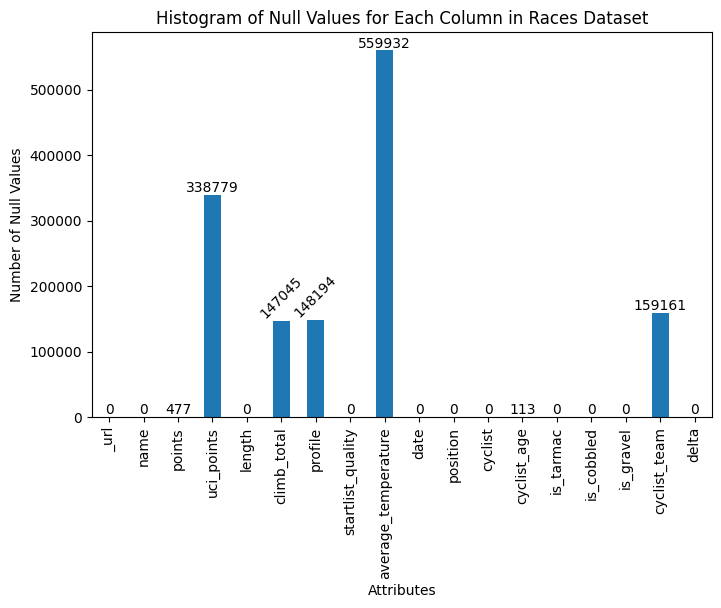

In [1882]:
# Calculate the number of null values for each column
null_counts = races_df.isnull().sum()

# Plot the histogram
ax = null_counts.plot(kind='bar', figsize=(8, 5), title='Histogram of Null Values for Each Column in Races Dataset')
plt.xlabel('Attributes')
plt.ylabel('Number of Null Values')

# Add y values over the columns, rotating only for "climb_total" and "profile"
for i, v in enumerate(null_counts):
    if null_counts.index[i] in ["climb_total", "profile"]:
        ax.text(i, v + 50, str(v), ha='center', va='bottom', rotation=45)
    else:
        ax.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()

Despite the previous dataset, in this case there are more missing values. The column with the most missing values is ```average_temperature``` followed by ```uci_points```, ```cyclist_team```, ```profile``` and ```climb_total```.

Below we plot the heatmap of the null values to obtain another view of the missing values.

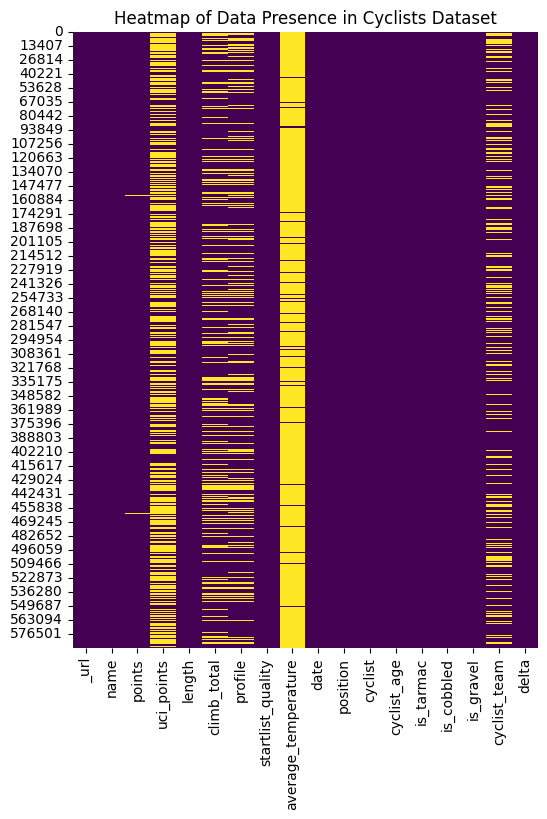

In [1883]:
# Heatmap of the presence of data in the cyclists_df dataset
plt.figure(figsize=(6, 8))
sns.heatmap(races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

### **Basic Statistics**

In [1884]:
races_df[races_numeric].describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta
count,589388.000000,251086.000000,589865.000000,442820.000000,441671.000000,589865.000000,29933.000000,589865.000000,589752.000000,589865.000000
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,21.731768,74.219491,28.486208,418.292794
std,54.435330,100.947962,64545.605664,1375.710722,1.491741,380.586928,5.884761,48.404023,3.855631,842.961596
min,18.000000,6.000000,1000.000000,2.000000,1.000000,115.000000,10.000000,0.000000,13.000000,-6906.000000
25%,50.000000,16.000000,152500.000000,1309.000000,1.000000,844.000000,17.000000,32.000000,26.000000,10.000000
50%,80.000000,60.000000,178200.000000,2255.000000,2.000000,988.000000,22.000000,70.000000,28.000000,156.000000
75%,100.000000,100.000000,203500.000000,3273.000000,4.000000,1309.000000,26.000000,112.000000,31.000000,624.000000
max,350.000000,800.000000,338000.000000,6974.000000,5.000000,2047.000000,36.000000,209.000000,56.000000,61547.000000


#### ```points``` and ```uci_points``` columns

Checking the web, it seems that ```points``` and ```uci_points``` haven't a hard lower or upper bound. The min/max values seem to be within reasonable ranges for both attributes.

#### ```length``` column

min and max values of ```length``` seems a bit anomalous. We briefly check their correctness.

In [2023]:
races_df[races_df['length'] == 1000.000000].head(5)


,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,start_date,duration
517517,tour-de-france/1988/prologue,Tour de France,NaN,NaN,1000.0,44.0,1.0,1941,NaN,1988-07-03 00:01:14,0,guido-bontempi,28.0,True,False,False,del-tongo-1986,0.0,1988-07-03,00:01:14
517518,tour-de-france/1988/prologue,Tour de France,NaN,NaN,1000.0,44.0,1.0,1941,NaN,1988-07-03 00:01:15,1,peter-stevenhaagen,23.0,True,False,False,NaN,1.0,1988-07-03,00:01:15
517519,tour-de-france/1988/prologue,Tour de France,NaN,NaN,1000.0,44.0,1.0,1941,NaN,1988-07-03 00:01:16,2,jelle-nijdam,25.0,True,False,False,lotto-super-club-1991,2.0,1988-07-03,00:01:16
517520,tour-de-france/1988/prologue,Tour de France,NaN,NaN,1000.0,44.0,1.0,1941,NaN,1988-07-03 00:01:17,3,etienne-de-wilde,30.0,True,False,False,denmark-1991,3.0,1988-07-03,00:01:17
517521,tour-de-france/1988/prologue,Tour de France,NaN,NaN,1000.0,44.0,1.0,1941,NaN,1988-07-03 00:01:17,4,gilbert-duclos-lassalle,34.0,True,False,False,kazakhstan-2022,3.0,1988-07-03,00:01:17


A stage of just one kilometer seems short, but checking on the web it turns out that the 1988 Tour de France preface was only one kilometre long and was not taken into account for the race. The value is therefore correct.

In [2024]:
races_df[races_df['length'] == 338000.000000].head(5)


,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,start_date,duration
539045,tour-de-france/1984/stage-9,Tour de France,100.0,NaN,338000.0,2013.0,1.0,1632,NaN,1984-07-07 09:40:11,0,jan-raas,32.0,True,False,False,kazakhstan-2019,0.0,1984-07-07,09:40:11
539046,tour-de-france/1984/stage-9,Tour de France,100.0,NaN,338000.0,2013.0,1.0,1632,NaN,1984-07-07 09:40:11,1,bruno-leali,26.0,True,False,False,watney-avia-1972,0.0,1984-07-07,09:40:11
539047,tour-de-france/1984/stage-9,Tour de France,100.0,NaN,338000.0,2013.0,1.0,1632,NaN,1984-07-07 09:40:14,2,marc-madiot,25.0,True,False,False,new-zealand-2020,3.0,1984-07-07,09:40:14
539048,tour-de-france/1984/stage-9,Tour de France,100.0,NaN,338000.0,2013.0,1.0,1632,NaN,1984-07-07 09:40:16,3,sean-kelly,28.0,True,False,False,csf-group-navigare-2008,5.0,1984-07-07,09:40:16
539049,tour-de-france/1984/stage-9,Tour de France,100.0,NaN,338000.0,2013.0,1.0,1632,NaN,1984-07-07 09:40:16,4,eric-vanderaerden,22.0,True,False,False,france-1978,5.0,1984-07-07,09:40:16


Same reasoning can be done with the max value. 380 kilometer seems a too much high value for a single stage. By checking online, we verified that stage nine in this Tour was notable because it was 338 km long.

#### ```climb_total``` column

Now we check ```climb_total``` min/max values.

In [1887]:
races_df[races_df['climb_total'] == 2.000000]['_url'].unique()

array(['tirreno-adriatico/2015/stage-1'], dtype=object)

The Stage 1 of Tirreno-Adriatico 2015 started at Lido di Camaiore - 2 vertical meters according to ProCycligStats.

In [1888]:
races_df[races_df['climb_total'] == 6974.000000]['_url'].unique()

array(['tour-de-france/1992/stage-13'], dtype=object)

Same reasoning for the Stage 13 of the Tour de France 1992. According to ProCyclingStats the vertical meters are 6974. We conclude that the values are correct.

#### ```profile``` column

The min and max values of ```profile``` are respectively 1 and 5 which fall within the expected range.

#### ```startlist_quality``` column

No particular considerations can be done about ```startlist_quality``` since we don't expect a particular range of values.

#### ```average_temperature``` column

Now let's consider the ```average_temperature``` column. The min and max values are 10 and 36. They seems reasonable values but we check them online on ProCyclingStats.

In [1889]:
races_df[races_df['average_temperature'] == 10.000000]['_url'].unique()

array(['amstel-gold-race/2022/result'], dtype=object)

56th Amstel Gold Race 2022 had an average temperature of 10°C. 

In [1890]:
races_df[races_df['average_temperature'] == 36.000000]['_url'].unique()

array(['volta-a-catalunya/2022/stage-6', 'tour-de-france/2022/stage-15'],
      dtype=object)

Same for the 101st Volta Ciclista a Catalunya (2022), stage 6, with an average temperature of 36°C and the stage 15 of the 2022 Tour de France with an average temperature of 36°C.

#### ```position``` column

For the ```position``` column we try to understand if the min value 0 is legal. Let's pick the first three rows with position 0.

In [1891]:
races_df[races_df['position'] == 0.000000].head(3)

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
106,vuelta-a-espana/2016/stage-14,Vuelta a España,80.0,100.0,196000.0,5575.0,5.0,821,NaN,2016-09-03 05:43:24,0,robert-gesink,30.0,True,False,False,new-zealand-1991,0.0
271,tour-de-france/2019/stage-21,Tour de France,100.0,120.0,128000.0,781.0,1.0,1699,NaN,2019-07-28 03:04:08,0,caleb-ewan,25.0,True,False,False,south-africa-1993,0.0


According to ProCyclingStats, Sean Kelly was the first cyclist in 1978 Tour de France, Stage 6. Overall the cyclists in the same stage were 106.

In [1892]:
races_df[races_df['_url'] == 'tour-de-france/1978/stage-6']

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,101,herman-beyssens,28.0,True,False,False,NaN,27.0
102,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,102,marcel-tinazzi,25.0,True,False,False,NaN,27.0
103,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,103,alain-de-carvalho,25.0,True,False,False,NaN,27.0
104,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,104,yvon-bertin,25.0,True,False,False,NaN,27.0


Since the last row represents the 105th cyclist, we assume that the cyclists' positions in the dataset start from 0 and not from 1. Let's check if this assumption is correct by checking the other two samples.

Gesink was the 1st cyclist in the 71st Vuelta a España, Stage 14. The total number of cyclists was 165 and in fact the last row position is 164. Moreover, Vanotti was the 165th cyclist in that race.

In [1893]:
races_df[races_df['_url'] == 'vuelta-a-espana/2016/stage-14'].tail(1)

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
270,vuelta-a-espana/2016/stage-14,Vuelta a España,80.0,100.0,196000.0,5575.0,5.0,821,NaN,2016-09-03 06:25:01,164,alessandro-vanotti,36.0,True,False,False,ceramica-panaria-navigare-2007,2497.0


In [1894]:
races_df[races_df['_url'] == 'tour-de-france/2019/stage-21'].tail(1)

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
425,tour-de-france/2019/stage-21,Tour de France,100.0,120.0,128000.0,781.0,1.0,1699,NaN,2019-07-28 03:07:41,154,mads-wurtz-schmidt,25.0,True,False,False,teka-1988,213.0


Again, the third sample confirms our assumption. So the positions are recorded starting from 0 and not from 1.

#### ```cyclist_age``` column

The min value of ```cyclist_age``` is 13 which seems not reasonable. We check the corresponding row in which this value appears.

In [1895]:
races_df[races_df['cyclist_age'] == 13.000000]

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
294489,san-sebastian/2001/result,Clasica Ciclista San Sebastian,225.0,NaN,227000.0,NaN,2.0,1048,NaN,2001-08-11 05:28:57,91,plamen-stanev,13.0,False,False,False,NaN,663.0


We check from the cyclist dataset the birth year of Plamen Stanev to check if ipotetically he was 13 in 2001.

In [1896]:
2001 - int(cyclists_df[cyclists_df['_url'] == 'plamen-stanev']['birth_year'].values[0])

13

The values seems correct. Indeed, a web search confirmed not only that he's a real cyclist but also the birth year and of course the age in 2001 is correct.

We do the same for the max value which seems also correct.

In [1897]:
races_df[races_df['cyclist_age'] == 56.000000]

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
114525,vuelta-a-espana/1996/stage-1,Vuelta a España,80.0,NaN,162000.0,862.0,NaN,988,NaN,1996-09-07 03:52:27,129,jose-azevedo-goncalves,56.0,True,False,False,NaN,0.0


In [1898]:
1996 - int(cyclists_df[cyclists_df['_url'] == 'jose-azevedo-goncalves']['birth_year'].values[0])

56

#### ```delta``` column

Concerning the ```delta``` values we have a negative one for the min which should be investigated. It seems an error since we don't expect a negative value for the delta. See the column analysis for more details.

### **Columns Analysis**

#### ```_url``` column

In [1899]:
races_df['_url'].nunique()

5281

This column contains the unique identifier of a race's stage. There are in total 5281 different ```_url``` values. An ```_url``` is in the format "RACE_NAME/RACE_DATE/STAGE_NUMBER". For example, the URL ```tour-de-france/1978/stage-6``` denotes the 6th stage of the Tour de France, 1978 edition.

In [1900]:
races_df.head(10)

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0
5,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,5,jacques-esclassan,30.0,True,False,False,kelme-costa-blanca-2000,27.0
6,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,6,walter-planckaert,30.0,True,False,False,navigare-blue-storm-1993,27.0
7,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,7,guy-sibille,30.0,True,False,False,NaN,27.0
8,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,8,jacques-bossis,26.0,True,False,False,NaN,27.0
9,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,9,bernard-bourreau,27.0,True,False,False,NaN,27.0


Obviously, if we look only at the column itself, we will find duplicate values. However, by looking at the first ten rows of the table, we assume that there is an entry for each rider who participated in a given stage. So we check that there are no duplicates for the same stage in terms of cyclists.

In [2025]:
# Group by '_url' and 'cyclist', then count the occurrences
duplicate_cyclists = races_df.groupby(['_url', 'cyclist']).size().reset_index(name='count')

# Filter out the rows where count is greater than 1, indicating duplicates
duplicate_cyclists = duplicate_cyclists[duplicate_cyclists['count'] > 1]

duplicate_cyclists

,_url,cyclist,count
9550,dauphine/2005/stage-1,ivan-gutierrez,2
9703,dauphine/2005/stage-2,ivan-gutierrez,2
9854,dauphine/2005/stage-3,ivan-gutierrez,2
10002,dauphine/2005/stage-4,ivan-gutierrez,2
10144,dauphine/2005/stage-5,ivan-gutierrez,2
...,...,...,...
500394,vuelta-a-espana/1997/stage-3,eleuterio-anguita,2
500777,vuelta-a-espana/1997/stage-5,eleuterio-anguita,2
500957,vuelta-a-espana/1997/stage-6,eleuterio-anguita,2
501131,vuelta-a-espana/1997/stage-7,eleuterio-anguita,2


As we can see, for the same stage there is a unique ```_url``` value related to a cyclist which is duplicated.

Another important thing we want to assess is the presence of inconsistencies.

In [ ]:
race_attributes = ["name", "points", "uci_points", "length", "climb_total", 
                   "startlist_quality", "average_temperature", "is_tarmac", "is_cobbled", "is_gravel"]

# Initialize an empty list to store _url values where inconsistencies are found
inconsistent_urls = []

# Check for each attribute in race_attributes
for attribute in race_attributes:
    # Group by _url and check if all values in the group are the same
    inconsistent = races_df.groupby('_url')[attribute].nunique() > 1
    # Append the _url values with inconsistencies to the list
    inconsistent_urls.extend(inconsistent[inconsistent].index.tolist())

# Display the inconsistent _url values
print("Inconsistent _url values:", len(inconsistent_urls))

Inconsistent _url values: 0


So there are no inconsistencies.

#### ```name``` column

The attribute is categorical. First of all we check if there are null values.

In [1903]:
# Check for null values in the 'name' column
print(f"There are {races_df['name'].isnull().sum()} null values in the 'name' column.")

There are 0 null values in the 'name' column.


In [1904]:
print(f"There are {races_df['name'].nunique()} unique race names in the dataset.")

There are 61 unique race names in the dataset.


There are no null values in the column which contains 61 unique values. They are the names of different races. We show those values to check in a qualitative way if there are some evident errors.

In [1905]:
races_df['name'].unique()

array(['Tour de France', 'Vuelta a España', 'Volta Ciclista a Catalunya',
       'Paris - Nice', 'Tirreno-Adriatico',
       'Critérium du Dauphiné Libéré', 'Critérium du Dauphiné',
       'Ronde van Vlaanderen / Tour des Flandres', 'Milano-Sanremo',
       'Tour de Suisse', "Giro d'Italia", 'Gran Camiño',
       'Tour de Romandie', 'Volta a Catalunya',
       'La Vuelta ciclista a España', 'La Flèche Wallonne',
       'E3-Prijs Harelbeke', 'Vuelta al País Vasco',
       'Vuelta Ciclista al País Vasco', 'Liège - Bastogne - Liège',
       'Paris-Roubaix', 'UAE Tour', 'World Championships ME - Road Race',
       'Amstel Gold Race', 'Dwars door België / À travers la Belgique',
       'Itzulia Basque Country', 'World Championships - Road Race',
       'Criterium du Dauphiné Libére', 'Omloop Het Volk',
       'Clasica Ciclista San Sebastian', 'Paris - Roubaix',
       'Strade Bianche', 'Giro di Lombardia', 'Criterium du Dauphiné',
       'O Gran Camiño', 'Grand Prix Cycliste de Quebec',
   

Now we check that ```name``` unique values are the same if we isolate the race name in the unique ```_url_``` identifier.

In [1906]:
# Split the _url column at the first '/' and take the first part
race_names = races_df['_url'].str.split('/', n=1).str[0]
# Count the unique values
race_names.nunique()


27

We notice that the total race names used in the unique identifier are only 27. This is because, as we show below, the same RACE_NAME part of the identifier is associated to different values in the names column.

In [1907]:
for name, group in races_df.groupby('name'):
    print(f"Race Name: {name}")
    unique_urls = group['_url'].str.split('/', n=1).str[0].unique()
    print(unique_urls)
    print()

Race Name: Amstel Gold Race
['amstel-gold-race']

Race Name: Clasica Ciclista San Sebastian
['san-sebastian']

Race Name: Clásica Ciclista San Sebastian
['san-sebastian']

Race Name: Clásica Ciclista San Sebastián
['san-sebastian']

Race Name: Clásica San Sebastián
['san-sebastian']

Race Name: Criterium du Dauphiné
['dauphine']

Race Name: Criterium du Dauphiné Libére
['dauphine']

Race Name: Critérium du Dauphiné
['dauphine']

Race Name: Critérium du Dauphiné Libéré
['dauphine']

Race Name: Donostia San Sebastian Klasikoa
['san-sebastian']

Race Name: Dwars door België / À travers la Belgique
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen - A travers la Flandre ME
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen / A travers la Flandre
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen / A travers la Flandre ME
['dwars-door-vlaanderen']

Race Name: E3 BinckBank Classic
['e3-harelbeke']

Race N

 This does not mean that the same identifier is associated with different races. Rather, the values in the name column for the same race differ only by a few letters (e.g. "e" instead of "è") or because the race has adopted a different name over the years or is simply known by different names. 

In particular:
- ```san-sebastian``` is associated to _Clasica Ciclista San Sebastian_, _Clásica Ciclista San Sebastian_, _Clásica Ciclista San Sebastián_, _Clásica San Sebastián_, _Donostia San Sebastian Klasikoa_
- ```dauphine``` is associated to _Criterium du Dauphiné_, _Criterium du Dauphiné Libére_, _Critérium du Dauphiné_, _Critérium du Dauphiné Libéré_
- ```dwars-door-vlaanderen``` is associated to _Dwars door België / À travers la Belgique_, _Dwars door Vlaanderen_, _Dwars door Vlaanderen - A travers la Flandre ME_, _Dwars door Vlaanderen / A travers la Flandre_, _Dwars door Vlaanderen / A travers la Flandre ME_
- ```e3-harelbeke``` is associated to _E3 BinckBank Classic_, _E3 Harelbeke_, _E3 Prijs Vlaanderen_, _E3 Prijs Vlaanderen - Harelbeke_, _E3 Saxo Bank Classic_, _E3 Saxo Classic_, _E3-Prijs Harelbek_
- ```gp-quebec``` is associated to _Grand Prix Cycliste de Quebec_, _Grand Prix Cycliste de Québec_
- ```liege-bastogne-liege``` is associated to _Liège - Bastogne - Liège_, _Liège-Bastogne-Liège_
- ```strade-bianche``` is associated to _Monte Paschi Eroica_, _Montepaschi Strade Bianche - Eroica Toscana_, _Strade Bianche_
- ```omloop-het-nieuwsblad``` is associated to _Omloop Het Nieuwsblad ME_, _Omloop Het Volk_, _Omloop Het Volk ME_
- ```paris-roubaix``` is associated to _Paris - Roubaix_, _Paris-Roubaix_
- ```ronde-van-vlaanderen``` is associated to _Ronde van Vlaanderen - Tour des Flandres ME_, _Ronde van Vlaanderen / Tour des Flandres_, _Ronde van Vlaanderen / Tour des Flandres ME_
- ```volta-a-catalunya``` is associated to _Volta Ciclista a Catalunya_, _Volta a Catalunya_
- ```itzulia-basque-country``` is associated to _Vuelta Ciclista al País Vasco_, _Vuelta al País Vasco_
- ```world-championship``` is associated to _World Championships - Road Race_, _World Championships ME - Road Race_

#### ```points``` column

First check is to see if the value feature is consistent within the same stage.

In [1908]:
consistency = races_df.groupby('_url')['points'].nunique()
# Filter the groups where the number of unique 'points' values is greater than 1
inconsistent = consistency[consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'points' values:", len(inconsistent))

Number of inconsistent 'points' values: 0


This is a numerical attribute. Same points for different cyclist are supposedly allowed. We now check if there are null values.

In [1909]:
int(races_df['points'].isnull().sum())

477

There are 477 null values in the column. We check if there are some illegal values.

In [1910]:
races_df['points'].dropna().unique()

array([100.,  80.,  50., 275.,  20., 225., 125., 350.,  75.,  70.,  30.,
       150.,  35.,  18.])

Since we have an entry for each cyclist in a stage, we expect that the ```points``` of the stage is the same for all the cyclists. So each race will contribute in a weighted way (weighted w.r.t. the number of cyclist in each stage) to the overall statistics. So we consider just one entry for each stage.

In [1911]:
# Group by '_url' and select the first non-null value for 'climb_total'
points_df = races_df.groupby('_url')['points'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

In [1912]:
points_df['points'].value_counts()

points
50.0     2098
80.0     1596
100.0     886
275.0     256
225.0     201
125.0      93
350.0      53
75.0       32
30.0       30
70.0       21
20.0        7
18.0        2
35.0        1
150.0       1
Name: count, dtype: int64

In [1913]:
# average points across the stages
points_df['points'].mean()

np.float64(89.46579495925715)

##### Plots

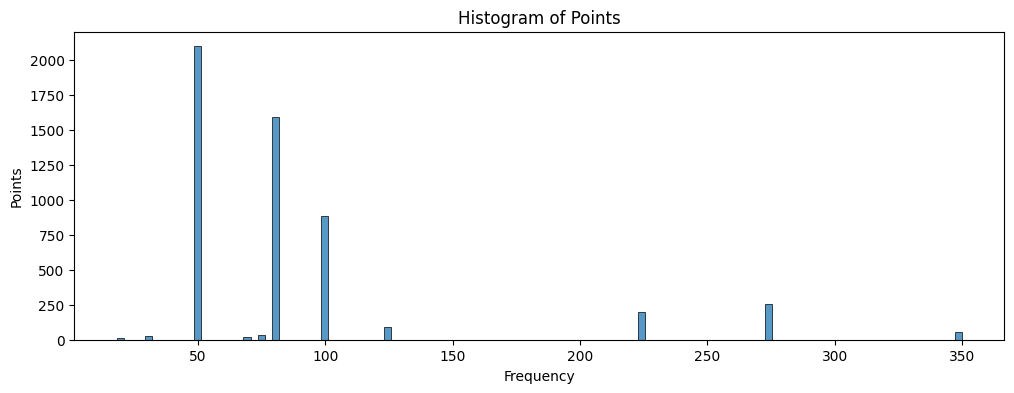

In [1914]:
plt.figure(figsize=(12, 4))
sns.histplot(points_df['points'].dropna(), bins=120, kde=False)
plt.title('Histogram of Points')
plt.ylabel('Points')
plt.xlabel('Frequency')
plt.show()

Through the histogram we can see that there are some recurrent points values like 50, 80 and 100. As we detailed before, 80 is near the average points value wich is ~90.

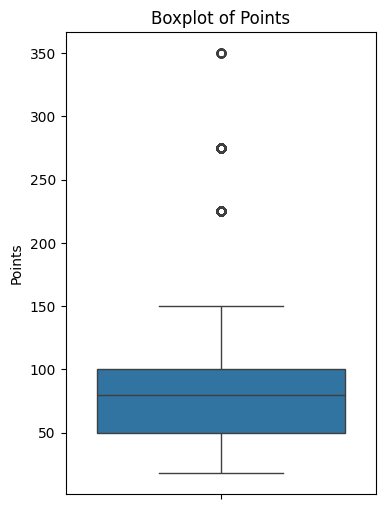

In [1915]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=points_df['points'])
plt.title('Boxplot of Points')
plt.ylabel('Points')
plt.show()

There are some outliers, more concentrated on the upper whisker. We check how many outliers there are using the IQR method.

In [1916]:
count_outliers(points_df['points'])

Number of outliers: 510 over 5277 values using the IQR method


We check the distribution of the points values over the years.

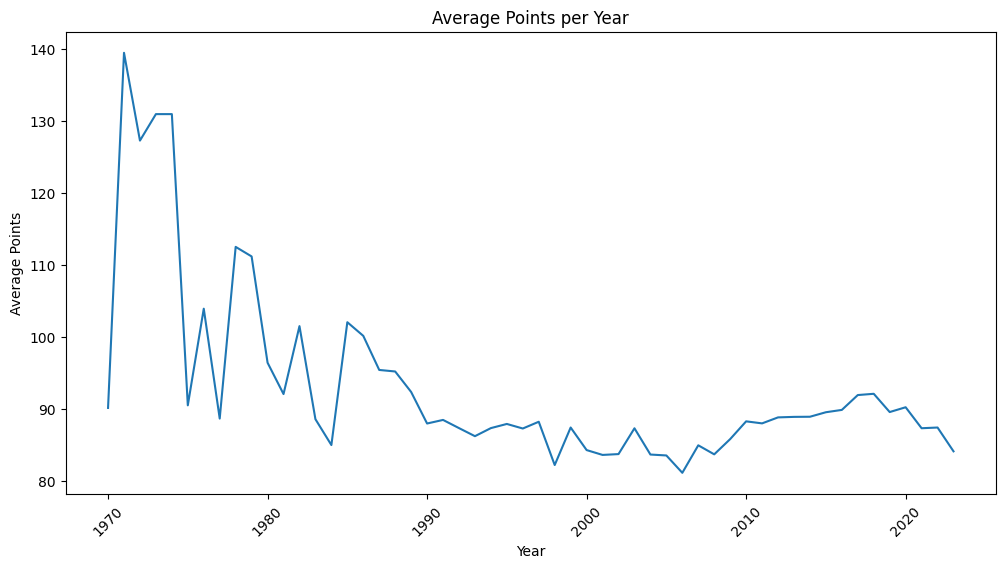

In [1917]:
# Extract the year from the '_url' column
points_df['year'] = points_df['_url'].str.extract(r'(\d{4})')

average_points_per_year = points_df.groupby('year')['points'].mean()

# Plot the points distribution over the years
plt.figure(figsize=(12, 6))
average_points_per_year.plot(kind='line')
plt.title('Average Points per Year')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.show()

On average, we can notice that the average points values are decreasing over the years probably (it's just an hypothesis) due to some changes in the way the points are assigned to the races.

#### ```uci_points``` column

First check is to see if the value feature is consistent within the same stage. 

In [1918]:
consistency = races_df.groupby('_url')['uci_points'].nunique()
# Filter the groups where the number of unique 'uci_points' values is greater than 1
inconsistent = consistency[consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'uci_points' values:", len(inconsistent))

Number of inconsistent 'uci_points' values: 0


This is a numerical attribute. Same points for different cyclist are supposedly allowed. We now check if there are null values.

In [1919]:
int(races_df['uci_points'].isnull().sum())

338779

There are 338779 which is a very high value. We check if there are some illegal values.

In [1920]:
races_df['uci_points'].dropna().unique()

array([100., 120.,  50.,  60.,   6.,  14.,  16., 500.,  20.,  40., 210.,
       400., 300., 800., 180., 200., 600.,  80.,  10., 402.])

In [1921]:
races_df['uci_points'].value_counts()

uci_points
100.0    47640
6.0      43390
16.0     41103
60.0     39317
20.0     21303
120.0    20785
50.0     13266
500.0     6096
40.0      4102
210.0     3449
180.0     3103
400.0     2571
300.0     2057
14.0       792
600.0      675
800.0      514
200.0      338
80.0       328
10.0       148
402.0      109
Name: count, dtype: int64

##### Plots

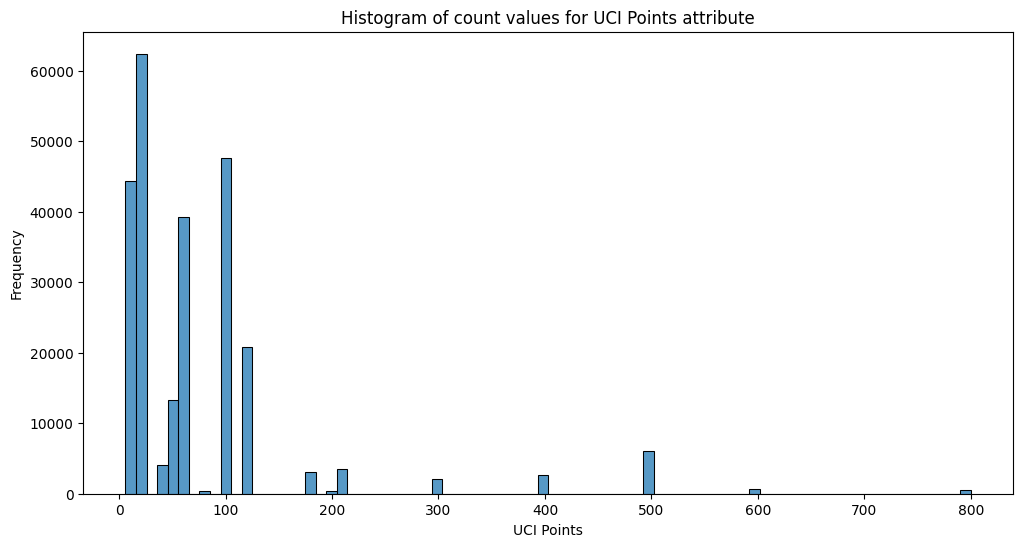

In [1922]:
# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(races_df['uci_points'].dropna(), bins=80, kde=False)

"""# Add text labels on each bin with rotation
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2. + 0.1, height),
                    ha='center', va='center', xytext=(0, 25), textcoords='offset points', rotation=90)
"""
# Set titles and labels
plt.title('Histogram of count values for UCI Points attribute')
plt.xlabel('UCI Points')
plt.ylabel('Frequency')

# Show the plot
plt.show()

As the previous histogram, we can see that there are some reccurrent points like 6, 16, 20, 50, 60, 100 and 120.

We now check for outliers.

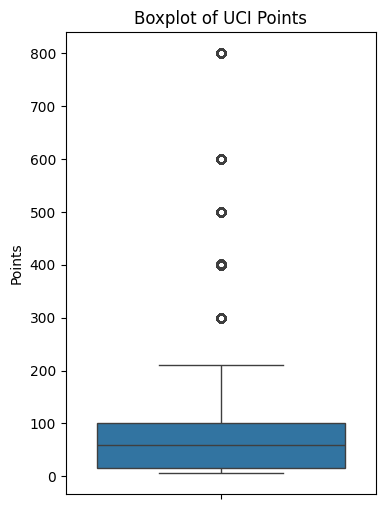

In [1923]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=races_df['uci_points'])
plt.title('Boxplot of UCI Points')
plt.ylabel('Points')
plt.show()

There are some outliers, more concentrated on the upper whisker. This, together with the other characteristics of the boxplot suggests a right positive skewness. We check how many outliers there are using the IQR method.

In [1924]:
count_outliers(races_df['uci_points'])

Number of outliers: 12022 over 251086 values using the IQR method


Despite the previous column, here we do not check the distribution over the years mainly due to the high presence of null values.

#### ```length``` column

First check is to see if the value feature is consistent within the same stage.

In [1925]:
climb_consistency = races_df.groupby('_url')['length'].nunique()
# Filter the groups where the number of unique 'length' values is greater than 1
inconsistent_climb = climb_consistency[climb_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'length' values:", len(inconsistent_climb))

Number of inconsistent 'length' values: 0


This is a numerical attribute. Duplicates are allowed. We check if there are null values.

In [1926]:
races_df['length'].isnull().sum()

np.int64(0)

Since we have an entry for each cyclist in a stage, we expect that the length of the stage is the same for all the cyclists. So each race will contribute in a weighted way (weighted w.r.t. the number of cyclist in each stage) to the overall statistics. To exclude that in the calculation of outliers and distribution we caculate a dataframe where we keep only one entry for each stage.

In [1927]:
# Group by '_url' and select the first non-null value for 'length'
length_df = races_df.groupby('_url')['length'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

##### Plots

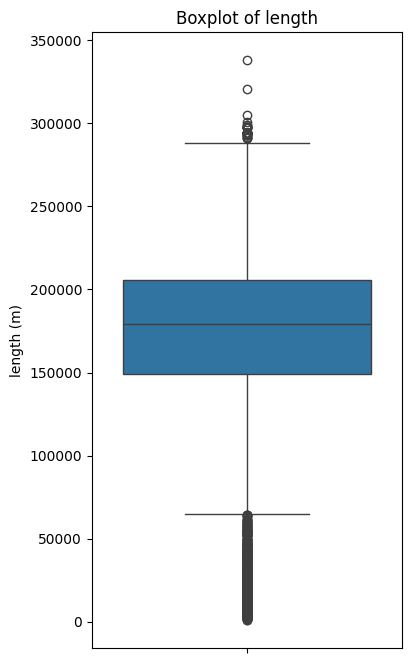

In [1928]:
plt.figure(figsize=(4, 8))
sns.boxplot(y=length_df['length'])
plt.title('Boxplot of length')
plt.ylabel('length (m)')
plt.show()

There are some outliers, more concentrated on the lower whisker. Despite this, there seems that we have a symmetric distribution or not so strong skewness. We check how many outliers there are using the IQR method.

In [1929]:
count_outliers(length_df['length'])

Number of outliers: 749 over 5281 values using the IQR method


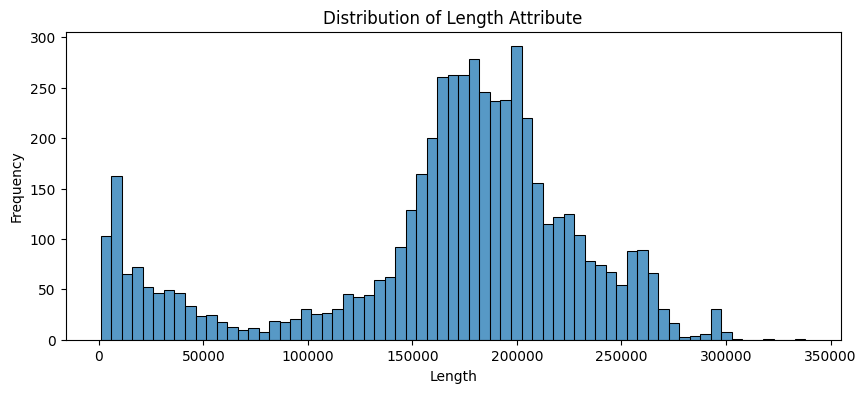

In [1930]:
plt.figure(figsize=(10, 4))
sns.histplot(length_df['length'].dropna(), binwidth=5000)
plt.title('Distribution of Length Attribute')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

There are two peaks, one near zero and a more prominent peak around 150000–200000. This may suggests the presence of two distinct subpopulations or groups in the data.

In [1931]:
# Column of interest
d = length_df['length']
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Null Count', 'Unique Value Counts', 'Mean', 'Max', 'Min', 'Variance', 'Description'],
    'Value': [
        d.isnull().sum(),
        d.nunique(),
        d.mean(),
        d.max(),
        d.min(),
        d.var(),
        d.describe().to_dict()
    ]
})

# Display the DataFrame
stats_df

,Statistic,Value
0,Null Count,0
1,Unique Value Counts,1280
2,Mean,165685.627722
3,Max,338000.0
4,Min,1000.0
5,Variance,4609033183.057595
6,Description,"{'count': 5281.0, 'mean': 165685.62772202236, ..."


We now plot the distribution of the average length over the years.

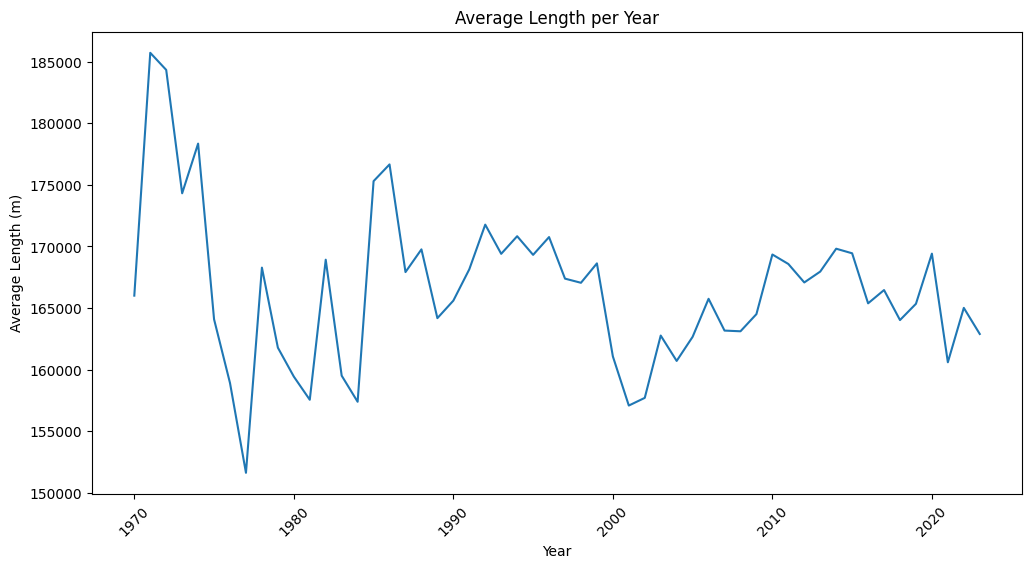

In [1932]:
# Extract the year from the _url column
length_df['year'] = length_df['_url'].str.extract(r'(\d{4})')

# Calculate the average length for each year
average_length_per_year = length_df.dropna(subset=['length']).groupby('year')['length'].mean()

# Plot the average length per year with increased scale on x-axis
plt.figure(figsize=(12, 6))
average_length_per_year.plot(kind='line')
plt.title('Average Length per Year')
plt.xlabel('Year')
plt.ylabel('Average Length (m)')
plt.xticks(rotation=45)
plt.show()

In [1933]:
min_year = average_length_per_year.idxmin()
max_year = average_length_per_year.idxmax()
print(f"Year with minimum average length: {min_year}")
print(f"Year with maximum average length: {max_year}")

Year with minimum average length: 1977
Year with maximum average length: 1971


In [1934]:
races_1977 = length_df[length_df['year'] == '1977'].dropna(subset=['length'])
races_1971 = length_df[length_df['year'] == '1971'].dropna(subset=['length'])
average_races_per_year = length_df.groupby('year').size().mean()

print(f"Average races per year: {average_races_per_year}")
print(f"Number of races in 1977: {len(races_1977)}")
print(f"Number of races in 1971: {len(races_1971)}")

Average races per year: 97.79629629629629
Number of races in 1977: 44
Number of races in 1971: 19


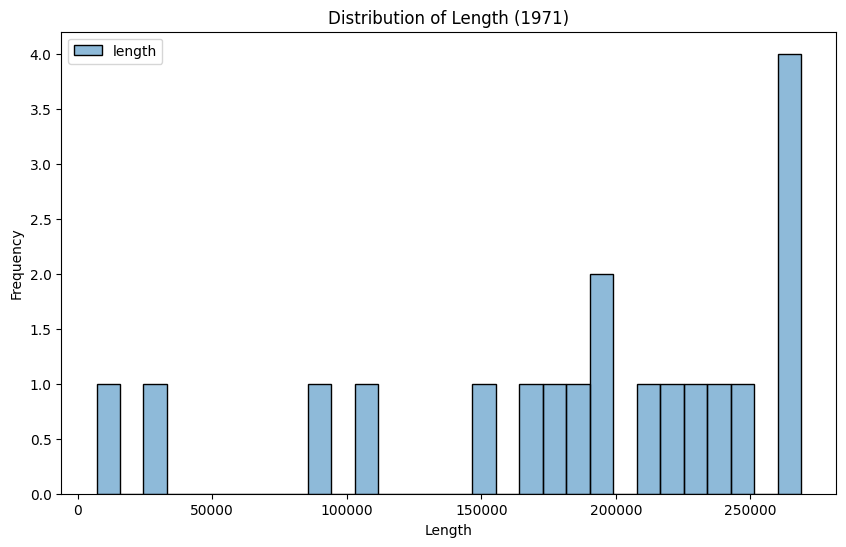

In [1935]:
plt.figure(figsize=(10, 6))
sns.histplot(races_1971, bins=30, kde=False)
plt.title('Distribution of Length (1971)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

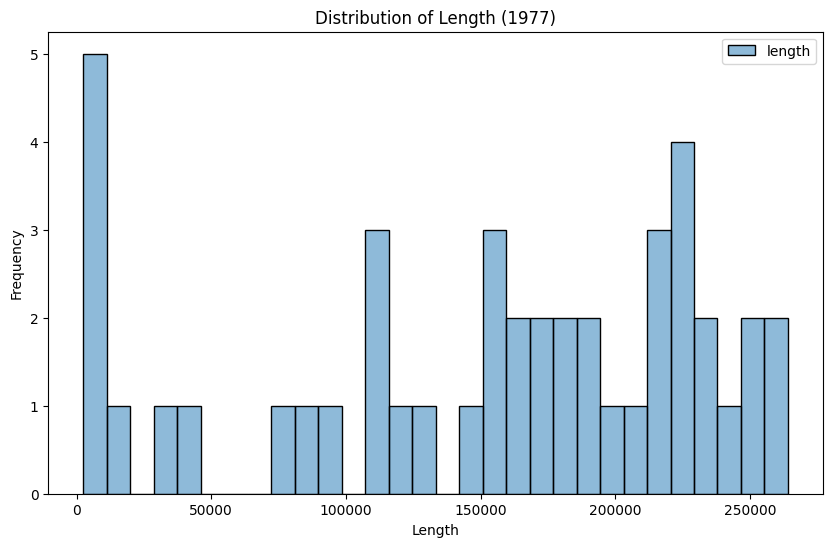

In [1936]:
plt.figure(figsize=(10, 6))
sns.histplot(races_1977, bins=30, kde=False)
plt.title('Distribution of Length (1977)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

We analyze the two peaks (min/max) in the plot since the behaviour of the length over the years has not an interesting trend with the exception of the two peaks. As we can see, the min peak correspond to the year 1977 while the max peak correspond to the year 1971. Both years have a number of races less that the average over the years but the peaks can be justified by noticing that the 1971 have a very high frequency of longer races with the respect to the 1977 in which we record a slightly opposite behaviour.

#### ```climb_total``` column

First check is to see if the value feature is consistent within the same stage.

In [1937]:
climb_consistency = races_df.groupby('_url')['climb_total'].nunique()
# Filter the groups where the number of unique 'climb_total' values is greater than 1
inconsistent_climb = climb_consistency[climb_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'climb_total' values:", len(inconsistent_climb))

Number of inconsistent 'climb_total' values: 0


It is a numerical column. Duplicates are allowed. We check if there are null values.

In [1938]:
print(races_df['climb_total'].isnull().sum(), 'duplicates found')

147045 duplicates found


Since we have an entry for each cyclist in a stage, we expect that the ```climb_total``` of the stage is the same for all the cyclists. So each race will contribute in a weighted way (weighted w.r.t. the number of cyclist in each stage) to the overall statistics. To exclude that in the calculation of outliers and distribution we caculate a dataframe where we keep only one entry for each stage.

In [1939]:
# Group by '_url' and select the first non-null value for 'climb_total'
climb_df = races_df.groupby('_url')['climb_total'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

We also check if ```climb_total``` is less or equal than the ```length``` for each entry.

In [1940]:
# Check if climb_total is less than or equal to length for each entry
invalid_entries = races_df[races_df['climb_total'] > races_df['length']]

invalid_entries

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta


There are no illegal entries.

##### Plots

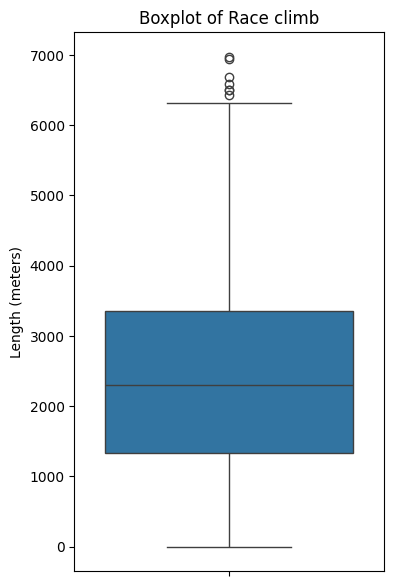

In [1941]:
plt.figure(figsize=(4, 7))
sns.boxplot(y=climb_df['climb_total'])
plt.title('Boxplot of Race climb')
plt.ylabel('Length (meters)')
plt.show()

There are some outliers, more concentrated on the upper whisker. Despite this, there seems that we have a slightly right skewed. We check how many outliers there are using the IQR method.

In [1942]:
count_outliers(climb_df['climb_total'])

Number of outliers: 7 over 3067 values using the IQR method


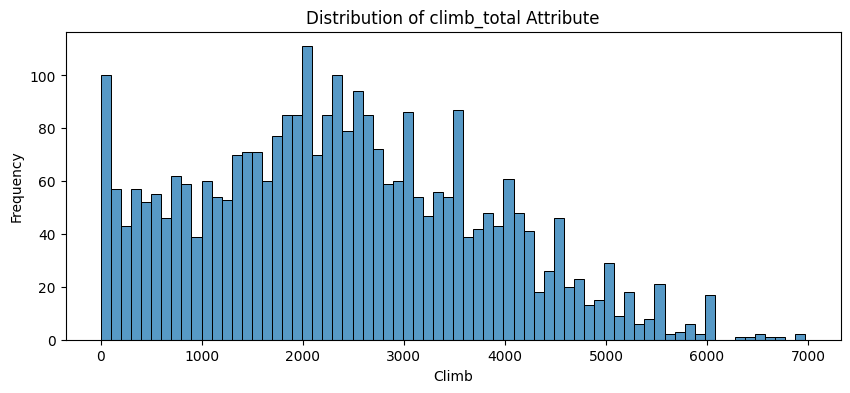

In [1943]:
plt.figure(figsize=(10, 4))
sns.histplot(climb_df['climb_total'].dropna(), binwidth=100)
plt.title('Distribution of climb_total Attribute')
plt.xlabel('Climb')
plt.ylabel('Frequency')
plt.show()

The majority of the values are concentrated between 0 and 4000. The frequency decreases as ```climb_total``` increases, with very few occurrences above 6000. Smaller ```climb_total`` values are more prevalent in the dataset.

And now we calculate some basic statistics.


In [1944]:
# Column of interest
d = climb_df['climb_total']
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Null Count', 'Unique Value Counts', 'Mean', 'Max', 'Min', 'Variance', 'Description'],
    'Value': [
        d.isnull().sum(),
        d.nunique(),
        d.mean(),
        d.max(),
        d.min(),
        d.var(),
        d.describe().to_dict()
    ]
})

stats_df

,Statistic,Value
0,Null Count,2214
1,Unique Value Counts,2117
2,Mean,2375.650473
3,Max,6974.0
4,Min,2.0
5,Variance,1944324.901927
6,Description,"{'count': 3067.0, 'unique': 2117.0, 'top': 350..."


There are 2214 null values in the column which is a high value.

We plot the behaviour of the ```climb_total``` over the years.

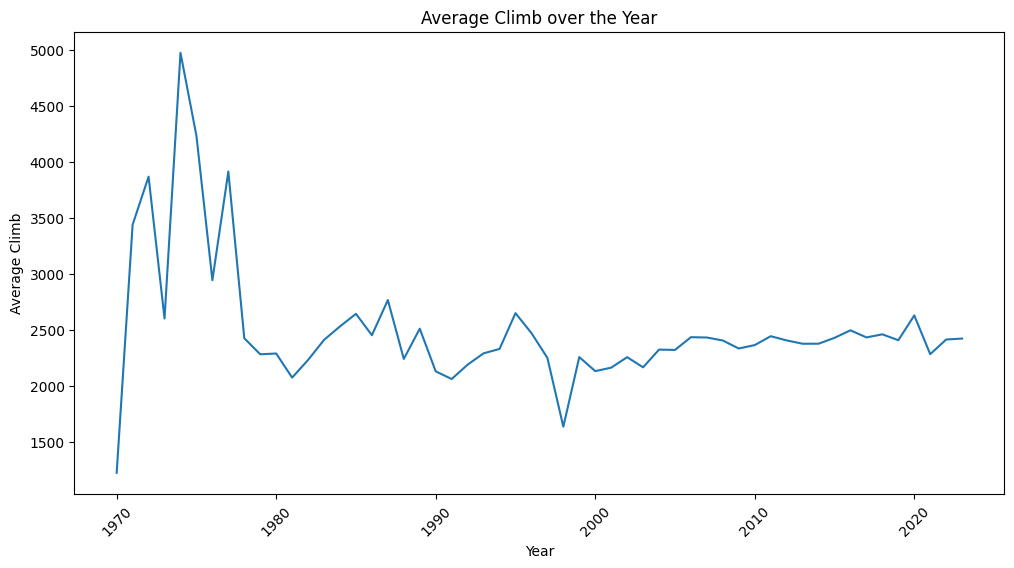

In [1945]:
# Extract the year from the _url column
climb_df['year'] = climb_df['_url'].str.extract(r'(\d{4})')

# Calculate the average length for each year
average_climb_per_year = climb_df.dropna(subset=['climb_total']).groupby('year')['climb_total'].mean()

# Plot the average length per year with increased scale on x-axis
plt.figure(figsize=(12, 6))
average_climb_per_year.plot(kind='line')
plt.title('Average Climb over the Year')
plt.xlabel('Year')
plt.ylabel('Average Climb')
plt.xticks(rotation=45)
plt.show()

In [1946]:
min_year = average_climb_per_year.idxmin()
max_year = average_climb_per_year.idxmax()
print(f"Year with minimum average length: {min_year}")
print(f"Year with maximum average length: {max_year}")

Year with minimum average length: 1970
Year with maximum average length: 1974


In [1947]:
races_1970 = climb_df[climb_df['year'] == '1970'].dropna(subset=['climb_total'])
races_1974 = climb_df[climb_df['year'] == '1974'].dropna(subset=['climb_total'])
average_races_per_year = climb_df.groupby('year').size().mean()

print(f"Average races per year: {average_races_per_year}")
print(f"Number of races in 1970: {len(races_1970)}")
print(f"Number of races in 1974: {len(races_1974)}")

Average races per year: 97.79629629629629
Number of races in 1970: 1
Number of races in 1974: 1


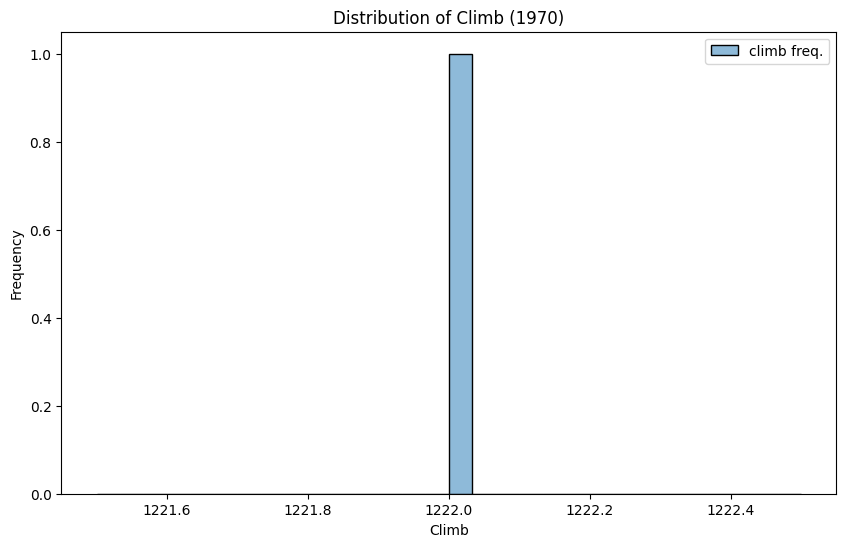

In [1948]:
plt.figure(figsize=(10, 6))
sns.histplot(races_1970, bins=30, kde=False)
plt.title('Distribution of Climb (1970)')
plt.xlabel('Climb')
plt.ylabel('Frequency')
plt.legend(['climb freq.'])
plt.show()

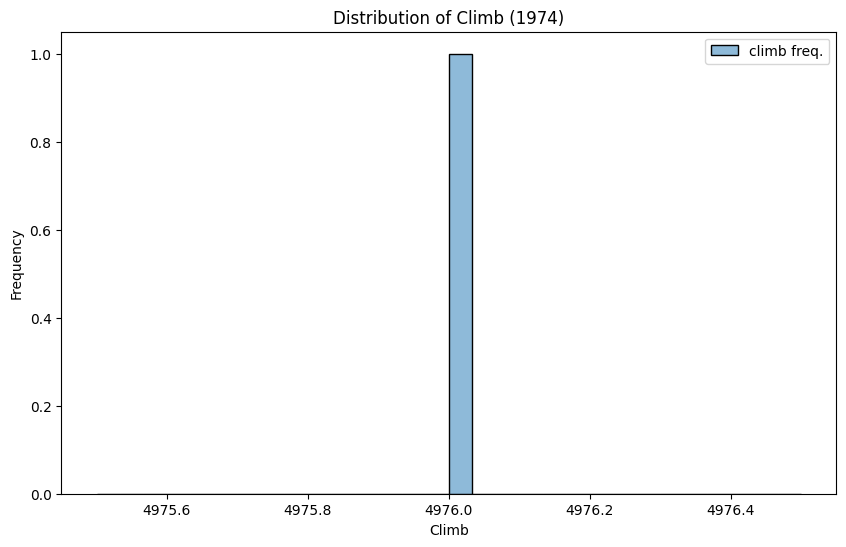

In [1949]:
plt.figure(figsize=(10, 6))
sns.histplot(races_1974, bins=30, kde=False)
plt.title('Distribution of Climb (1974)')
plt.xlabel('Climb')
plt.ylabel('Frequency')
plt.legend(['climb freq.'])
plt.show()

As we can see, both peaks have only one races since the other entries are null. Despite this, the peaks are justified by the fact that the ```climb_total``` in 1970 is less that the ```climb_total``` in 1974. More in general we can also notice that the ```climb_total``` has decresed with respect to the past years starting from ~80s and that slightly stabilized until 2023.

#### ```profile``` column

First check is to see if the value profile is consistent within the same stage.

In [1950]:
profile_consistency = races_df.groupby('_url')['profile'].nunique()
# Filter the groups where the number of unique 'climb_total' values is greater than 1
inconsistent_profiles = profile_consistency[profile_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'profile' values:", len(inconsistent_profiles))

Number of inconsistent 'profile' values: 0


Since we have an entry for each cyclist in a stage, we expect that the ```profile``` of the stage is the same for all the cyclists. So each race will contribute in a weighted way (weighted w.r.t. the number of cyclist in each stage) to the overall statistics. So we caculate a dataframe where we keep only one entry for each stage.

In [1951]:
# Group by '_url' and select the first non-null value for 'profile'
profile_df = races_df.groupby('_url')['profile'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

##### Plots

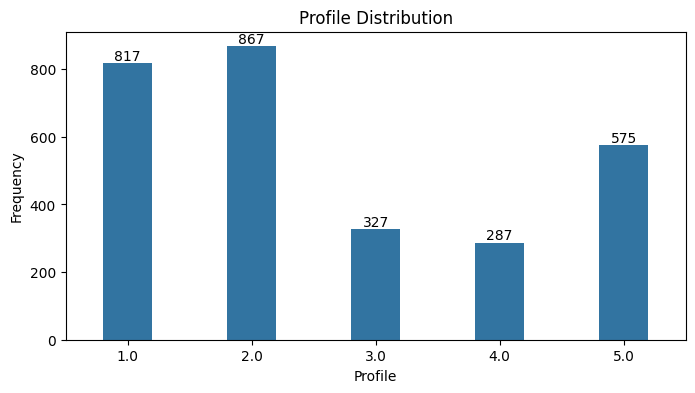

In [1952]:
# Print the frequencies of 'profile' in profile_df, excluding NaN values
profile_frequencies = profile_df['profile'].dropna().value_counts()

plt.figure(figsize=(8, 4))
ax = sns.countplot(x='profile', data=profile_df.dropna(subset=['profile']), width=0.4)
plt.title('Profile Distribution')
plt.xlabel('Profile')
plt.ylabel('Frequency')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


The most prevalent profile is the hilly one, followed by the flat, hig mountains with uphill finish, mountainous and high mountains.

And now we check how many null values there are.

In [1953]:
print(f"There are {profile_df['profile'].isnull().sum()} unique null values in the 'profile' column.")

There are 2408 unique null values in the 'profile' column.


#### ```startlist_quality``` column

First check is to see if the value profile is consistent within the same stage.

In [1954]:
startlist_consistency = races_df.groupby('_url')['startlist_quality'].nunique()
# Filter the groups where the number of unique 'profile' values is greater than 1
inconsistent_startlist = startlist_consistency[startlist_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'startlist_quality' values:", len(inconsistent_startlist))

Number of inconsistent 'startlist_quality' values: 0


Since we have an entry for each cyclist in a stage, we expect that the ```startlis_quality``` of the stage is the same for all the cyclists. This can cause the fact that each race will contribute in a weighted way (weighted w.r.t. the number of cyclist in each stage) to the overall statistics. To exclude that in the calculation of outliers and distribution we caculate a dataframe where we keep only one entry for each stage.

In [1955]:
# Group by '_url' and select the first non-null value for 'startlist_quality'
startlistq_df = races_df.groupby('_url')['startlist_quality'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

##### Plots

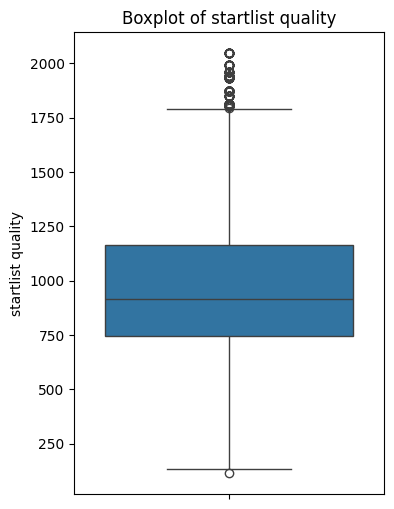

In [1956]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=startlistq_df['startlist_quality'])
plt.title('Boxplot of startlist quality')
plt.ylabel('startlist quality')
plt.show()

There are some outliers, more concentrated on the lower whisker. The distribution seems positive skewed. We check how many outliers there are using the IQR method.

In [1957]:
count_outliers(startlistq_df['startlist_quality'])

Number of outliers: 260 over 5281 values using the IQR method


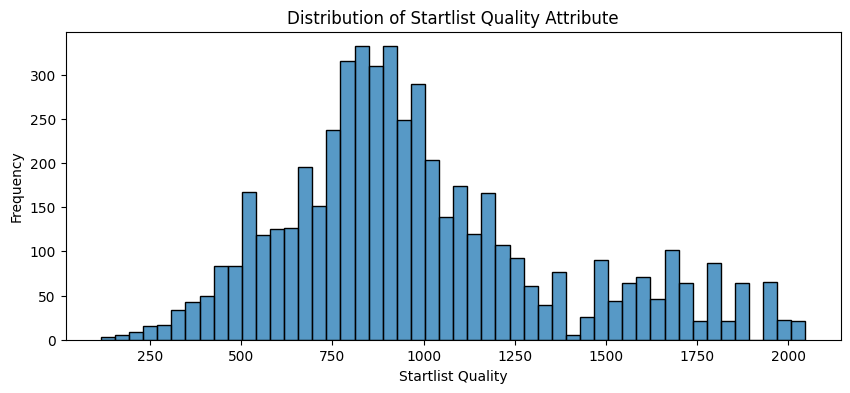

In [1958]:
plt.figure(figsize=(10, 4))
sns.histplot(startlistq_df['startlist_quality'].dropna(), bins=50)
plt.title('Distribution of Startlist Quality Attribute')
plt.xlabel('Startlist Quality')
plt.ylabel('Frequency')
plt.show()

The highest frequencies observed between 750 and 1000. The frequency decreases gradually beyond 1000, with fewer occurrences as the value approaches 2000 where there are fewer outliers.

In [1959]:
# Column of interest
d = startlistq_df['startlist_quality']
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Null Count', 'Unique Value Counts', 'Mean', 'Max', 'Min', 'Variance', 'Description'],
    'Value': [
        d.isnull().sum(),
        d.nunique(),
        d.mean(),
        d.max(),
        d.min(),
        d.var(),
        d.describe().to_dict()
    ]
})

stats_df

,Statistic,Value
0,Null Count,0
1,Unique Value Counts,697
2,Mean,988.701572
3,Max,2047
4,Min,115
5,Variance,144742.946151
6,Description,"{'count': 5281.0, 'mean': 988.7015716720318, '..."


We now inspect the distribution of the ```startlist_quality``` over the years.

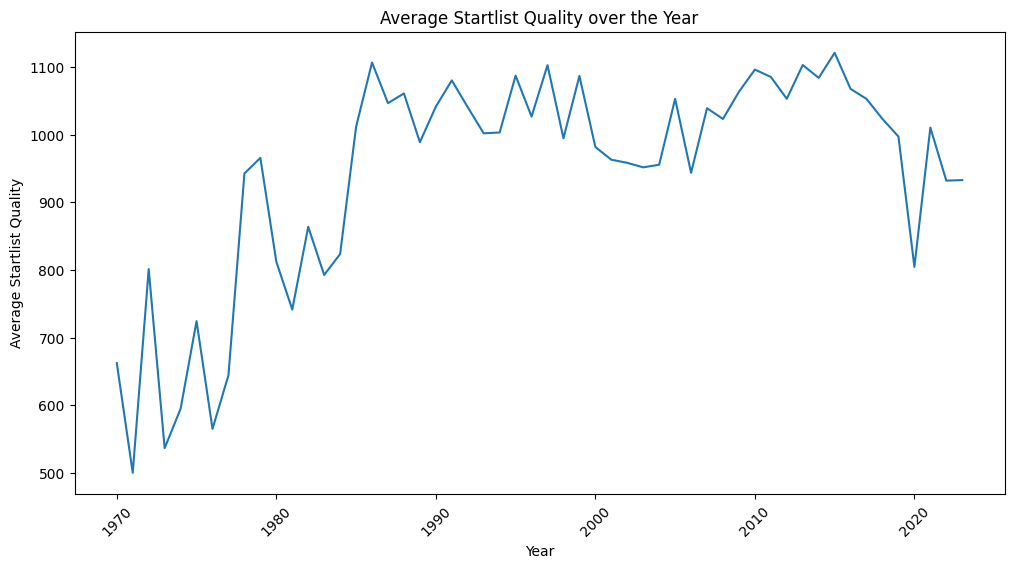

In [1960]:
# Extract the year from the _url column
startlistq_df['year'] = startlistq_df['_url'].str.extract(r'(\d{4})')

# Calculate the average length for each year
average_startlistq_per_year = startlistq_df.dropna(subset=['startlist_quality']).groupby('year')['startlist_quality'].mean()

# Plot the average length per year with increased scale on x-axis
plt.figure(figsize=(12, 6))
average_startlistq_per_year.plot(kind='line')
plt.title('Average Startlist Quality over the Year')
plt.xlabel('Year')
plt.ylabel('Average Startlist Quality')
plt.xticks(rotation=45)
plt.show()

We can notice an increasing trend of the ```startlist_quality``` over the years with not really notable beahaviours with the exeption of the 2020, years in which the COVID-19 pandemic happened so less races were organized.

#### **```date``` column** -> ```start_date```, ```duration``` column 

In order to perform a separate analysis on the starting date of the races and the duration of the races, we decided to split these columns directly in the data understanding analysis. 

In [1961]:
# First convert the 'date' column to datetime format
races_df['date'] = pd.to_datetime(races_df['date'])

We count null values

In [1962]:
races_df['date'].isnull().sum()

np.int64(0)

Split the column in ```start_date``` and ```duration```

In [1963]:
# Split the 'date' column into 'start_date' and 'duration'
races_df['start_date'] = races_df['date'].dt.date
races_df['duration'] = races_df['date'].dt.time

Understanding min and max  ```date``` values

In [1964]:
temp_year_df = pd.DataFrame()

# Ensure the 'date' column is in datetime format
temp_year_df['start_date'] = pd.to_datetime(races_df['start_date'])

# Extract the year from the 'date' column
temp_year_df['start_date'] = temp_year_df['start_date']

# Calculate the minimum, maximum, and average year
min_year = temp_year_df['start_date'].min()
max_year = temp_year_df['start_date'].max()
avg_year = temp_year_df['start_date'].dt.year.mean()

print(f"Minimum Date: {min_year.date()}")
print(f"Maximum Date: {max_year.date()}")
print(f"Average Year: {avg_year:.0f}")

Minimum Date: 1970-02-28
Maximum Date: 2023-07-29
Average Year: 2006


So in the dataset there are races ranging from 1970 to 2023.

 ```date``` distribution over time

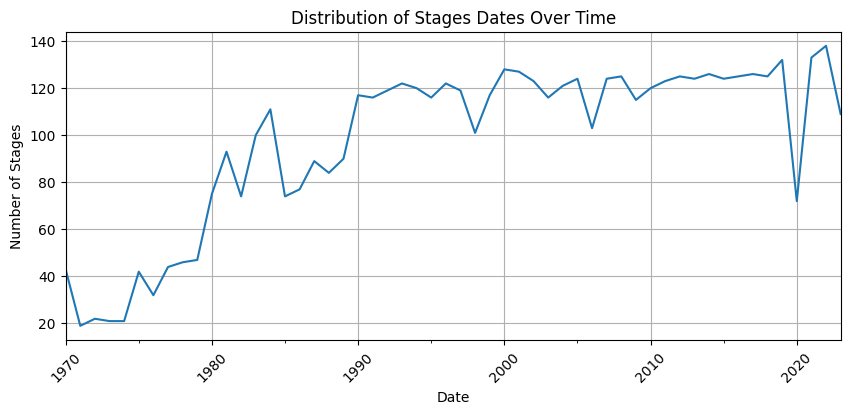

In [1965]:
# Group by '_url' and take only the first row of each group
race_dates = races_df.groupby('_url').first().reset_index()

# Convert 'start_date' to datetime if it isn't already
race_dates['start_date'] = pd.to_datetime(race_dates['start_date'])

# Set 'start_date' as the index to plot over time
race_dates.set_index('start_date', inplace=True)

# Resample by year and count the events
date_counts = race_dates.resample('YE').size()

# Plot the time series
plt.figure(figsize=(10, 4))
date_counts.plot(kind='line')
plt.title('Distribution of Stages Dates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stages')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


There is an overall increasing trend in the number of stages up until the late 1980s, followed by a stabilization and slight fluctuations through the 1990s and 2000s. A drop is observed around 2020, when the **COVID-19** pandemic happened. We expected to see a drop to zero but accordingly to ProCyclingStats not all the races were canceld.

 ```date``` box plot

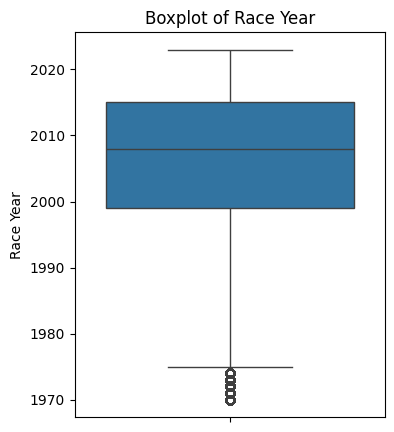

In [1966]:
plt.figure(figsize=(4, 5))
sns.boxplot(y=temp_year_df['start_date'].dt.year)
plt.title('Boxplot of Race Year')
plt.ylabel('Race Year')
plt.show()

There are some outliers, concentrated more or less beyond lower whisker. The boxplot is left skewed. Both with the distribution plotted before, we can see that the number of stages is increasing over time. In particular the races have become more frequent in recent decades, with a notable concentration after the year 2000. 

In [1967]:
count_outliers(temp_year_df['start_date'].dt.year)

Number of outliers: 1835 over 589865 values using the IQR method


Understanding min and max  ```duration``` values

In [1968]:
races_df['duration'].describe()

count       589865
unique       24444
top       04:24:10
freq           525
Name: duration, dtype: object

Since we have an entry for each cyclist in a stage, we expect that the ```duration``` of the stage is the same for all the cyclists. This makes impractical plotting distributions. So we caculate a dataframe where we keep only one entry for each stage.

In [1969]:
duration_df = races_df.groupby('_url')['duration'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

In [1970]:
# convert the 'duration' column to seconds, more useful for analysis
duration_df['duration_seconds'] = duration_df['duration'].apply(lambda x: pd.to_timedelta(str(x)).total_seconds())
duration_df['duration_seconds'].describe()

count     5281.000000
mean     15226.077447
std       6497.421745
min         74.000000
25%      13211.000000
50%      16309.000000
75%      19194.000000
max      35886.000000
Name: duration_seconds, dtype: float64

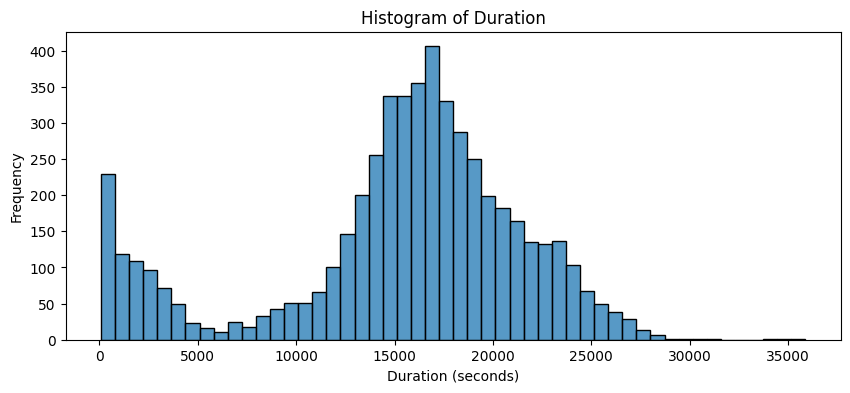

In [1971]:
# Plot the histogram
plt.figure(figsize=(10, 4))
sns.histplot(duration_df['duration_seconds'], bins=50)
plt.title('Histogram of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

There is a slight bimodal distribution. The first peak occurs near 0 seconds, suggesting a notable number of very short durations, potentially representing incomplete or anomalous events. The second peak is around 15000 seconds indicates the typical range for most durations according to the mean. Then, there are some significantly longer times that occur less frequently.

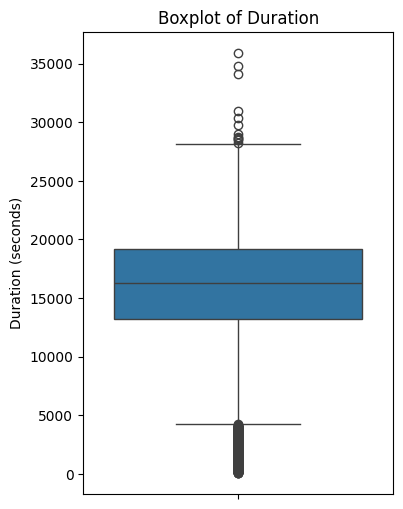

In [1972]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=duration_df['duration_seconds'])
plt.title('Boxplot of Duration')
plt.ylabel('Duration (seconds)')
plt.show()

There are some outliers beyond the upper and lower whiskers and there is a symmetric distribution or not so strong skewness. We check how many outliers there are using the IQR method.

In [1973]:
count_outliers(duration_df['duration_seconds'])

Number of outliers: 677 over 5281 values using the IQR method


#### ```average_temperature``` column

First check is to see if the value profile is consistent within the same stage.

In [1974]:
temp_consistency = races_df.groupby('_url')['average_temperature'].nunique()
# Filter the groups where the number of unique 'profile' values is greater than 1
temp_profiles = temp_consistency[temp_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'average_temperature' values:", len(temp_profiles))

Number of inconsistent 'average_temperature' values: 0


Since we have an entry for each cyclist in a stage, we expect that the ```average_temperature``` of the stage is the same for all the cyclists. So each race will contribute in a weighted way (weighted w.r.t. the number of cyclist in each stage) to the overall statistics. So we caculate a dataframe where we keep only one entry for each stage.

In [1975]:
# Group by '_url' and select the first non-null value for 'startlist_quality'
temp_year_df = races_df.groupby('_url')['average_temperature'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

##### Plots

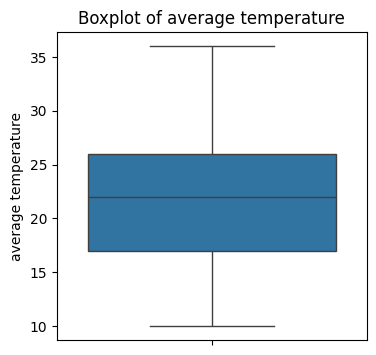

In [1976]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=temp_year_df['average_temperature'])
plt.title('Boxplot of average temperature')
plt.ylabel('average temperature')
plt.show()

For this column there are no outliers.

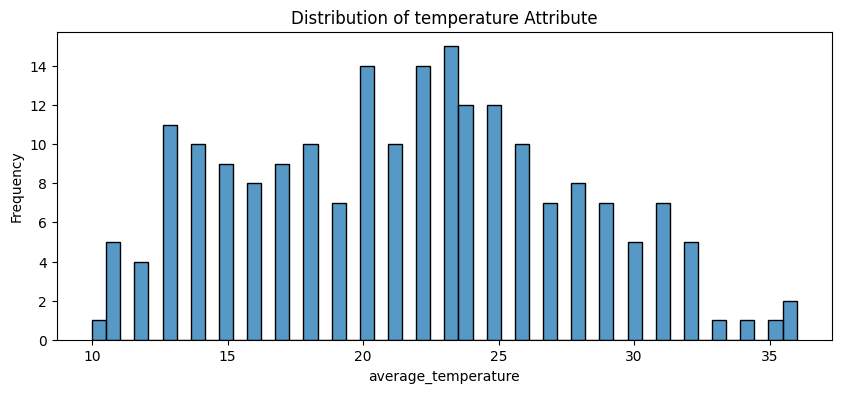

In [1977]:
plt.figure(figsize=(10, 4))
sns.histplot(temp_year_df['average_temperature'].dropna(), bins=50)
plt.title('Distribution of temperature Attribute')
plt.xlabel('average_temperature')
plt.ylabel('Frequency')
plt.show()

The most common value for the temperature is around 24°C and more in general between 20 and 25°C. Thee is another pick around 13°C.

In [1978]:
# Column of interest
d = temp_year_df['average_temperature']
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Null Count', 'Unique Value Counts', 'Mean', 'Max', 'Min', 'Variance', 'Description'],
    'Value': [
        d.isnull().sum(),
        d.nunique(),
        d.mean(),
        d.max(),
        d.min(),
        d.var(),
        d.describe().to_dict()
    ]
})

stats_df

,Statistic,Value
0,Null Count,5076
1,Unique Value Counts,27
2,Mean,21.62439
3,Max,36.0
4,Min,10.0
5,Variance,35.510187
6,Description,"{'count': 205.0, 'unique': 27.0, 'top': 23.0, ..."


There are only few null values in the column.

#### ```position``` column

In [1979]:
int(races_df['position'].isnull().sum())

0

We check that for the same stage, position value is monotonicallly increasing.

In [1980]:
# Group by '_url' and check if 'position' is strictly monotonically increasing within each group
# We group by url, then check if the difference between consecutive values is always positive (strictly increasing) If true, then the position is strictly monotonically increasing
strictly_monotonic_increasing = races_df.groupby('_url')['position'].apply(lambda x: (x.diff().dropna() > 0).all())

# Display the result
print(strictly_monotonic_increasing.value_counts())

position
True    5281
Name: count, dtype: int64


We conclude that the values are monotonically increasing. If they are stricly monotonically increasing, we exclude the presence of duplicates.

In [1981]:
races_df.groupby('_url')['position'].first().value_counts()

position
0    5281
Name: count, dtype: int64

All the races recorded in the dataset have a position value starting from 0.

#### ```cyclist``` column

In [1982]:
races_df['cyclist'].isnull().sum()

np.int64(0)

There are no null values in the column. Duplicated are expected but we check if, for the same stage of a race, there are no duplicated cyclists values.

In [1983]:
races_df[races_df.duplicated(subset=['_url', 'cyclist'], keep=False)]

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,start_date,duration
2310,vuelta-a-espana/1993/stage-21,Vuelta a España,80.0,NaN,44600.0,818.0,NaN,819,NaN,1993-05-16 01:06:37,11,ignacio-garcia,25.0,True,False,False,NaN,338.0,1993-05-16,01:06:37
2340,vuelta-a-espana/1993/stage-21,Vuelta a España,80.0,NaN,44600.0,818.0,NaN,819,NaN,1993-05-16 01:10:33,41,ignacio-garcia,25.0,True,False,False,NaN,574.0,1993-05-16,01:10:33
3109,vuelta-a-espana/1984/stage-11,Vuelta a España,80.0,NaN,182000.0,NaN,NaN,747,NaN,1984-04-28 04:50:02,44,rafael-garcia,23.0,True,False,False,NaN,826.0,1984-04-28,04:50:02
3137,vuelta-a-espana/1984/stage-11,Vuelta a España,80.0,NaN,182000.0,NaN,NaN,747,NaN,1984-04-28 04:56:09,72,rafael-garcia,23.0,True,False,False,NaN,1193.0,1984-04-28,04:56:09
7464,vuelta-a-espana/1993/stage-4,Vuelta a España,80.0,NaN,233400.0,1375.0,NaN,819,NaN,1993-04-29 05:45:50,30,ignacio-garcia,25.0,True,False,False,NaN,0.0,1993-04-29,05:45:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579374,vuelta-a-espana/1997/stage-7,Vuelta a España,80.0,NaN,219200.0,5218.0,NaN,1165,NaN,1997-09-12 06:43:42,141,eleuterio-anguita,28.0,True,False,False,NaN,1716.0,1997-09-12,06:43:42
583290,vuelta-a-espana/1997/stage-9,Vuelta a España,80.0,NaN,38000.0,238.0,NaN,1165,NaN,1997-09-14 01:12:02,105,eleuterio-anguita,28.0,True,False,False,NaN,330.0,1997-09-14,01:12:02
583295,vuelta-a-espana/1997/stage-9,Vuelta a España,80.0,NaN,38000.0,238.0,NaN,1165,NaN,1997-09-14 01:12:07,110,eleuterio-anguita,28.0,True,False,False,NaN,335.0,1997-09-14,01:12:07
584626,dauphine/2005/stage-2,Critérium du Dauphiné Libéré,50.0,NaN,187000.0,NaN,NaN,933,NaN,2005-06-07 04:50:22,30,ivan-gutierrez,27.0,True,False,False,france-1978,196.0,2005-06-07,04:50:22


As we can see from the table above, for the same stage, there are duplicated ```cyclist``` values. We can also notice that in the same rows of a duplicate there are also other altered values like ```date```, ```position``` or ```delta```.

#### ```cyclist_age``` column

This is a numerical attribute. First of all we check if there are null values and if all the entries are numerical.

In [1984]:
races_df['cyclist_age'].isnull().sum()

np.int64(113)

In [1985]:
races_df['cyclist_age'].unique()

array([22., 27., 24., 30., 26., 36., 23., 32., 31., 28., 29., 21., 25.,
       35., 38., 39., 34., 37., 33., 40., 20., 19., nan, 42., 41., 44.,
       43., 45., 56., 13.])

As we can see, there are 113 null entries but the remaining values are numerical.

Duplicates in the column are allowed but not for the same cyclist which can be also duplicated for the same stage as we checked in the previous column analysis. We check if the age reported for each cyclist is consistent across the column to gather more informations for the DP part.

In [1986]:
# Group by 'cyclist' and check if there are different 'cyclist_age' values
age_inconsistencies = races_df.groupby('cyclist')['cyclist_age'].nunique()

# Filter the cyclists with more than one unique age value
age_inconsistencies[age_inconsistencies > 1]


cyclist
aad-van-den-hoek       8
aaron-gate             2
aaron-kemps            4
aaron-olsen            2
aaron-van-poucke       3
                      ..
zdenek-stybar         13
zenon-jaskula          8
zhandos-bizhigitov     3
zico-waeytens          6
zoran-klemencic        5
Name: cyclist_age, Length: 4511, dtype: int64

As expected the same cyclist is associated to more than one age value.

##### Plots

In [1987]:
races_df['cyclist_age'].describe()

count    589752.000000
mean         28.486208
std           3.855631
min          13.000000
25%          26.000000
50%          28.000000
75%          31.000000
max          56.000000
Name: cyclist_age, dtype: float64

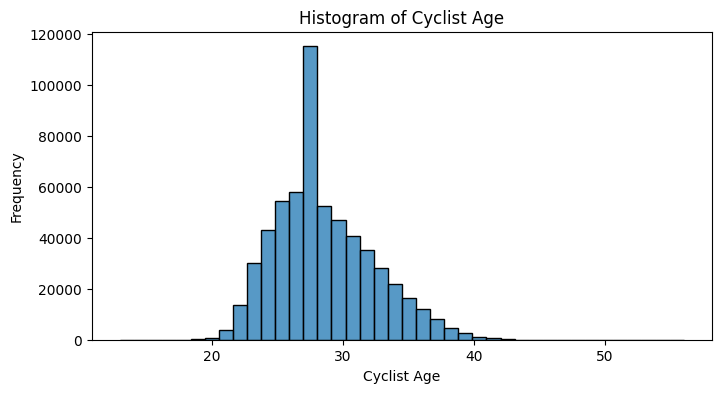

In [1988]:
plt.figure(figsize=(8, 4))
sns.histplot(races_df['cyclist_age'].dropna(), bins=40)
plt.title('Histogram of Cyclist Age')
plt.xlabel('Cyclist Age')
plt.ylabel('Frequency')
plt.show()

The average age of cyclist in the dataset is 28 y.o.

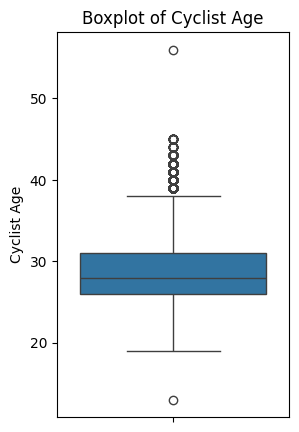

In [1989]:
plt.figure(figsize=(3, 5))
sns.boxplot(y=races_df['cyclist_age'])
plt.title('Boxplot of Cyclist Age')
plt.ylabel('Cyclist Age')
plt.show()

There are some outliers, more concentrated on the upper whisker. The distribution seems positive skewed. We check how many outliers there are using the IQR method.

In [1990]:
count_outliers(races_df['cyclist_age'])

Number of outliers: 4247 over 589752 values using the IQR method


We now try to understand how the age of the cyclists has changed over the years.

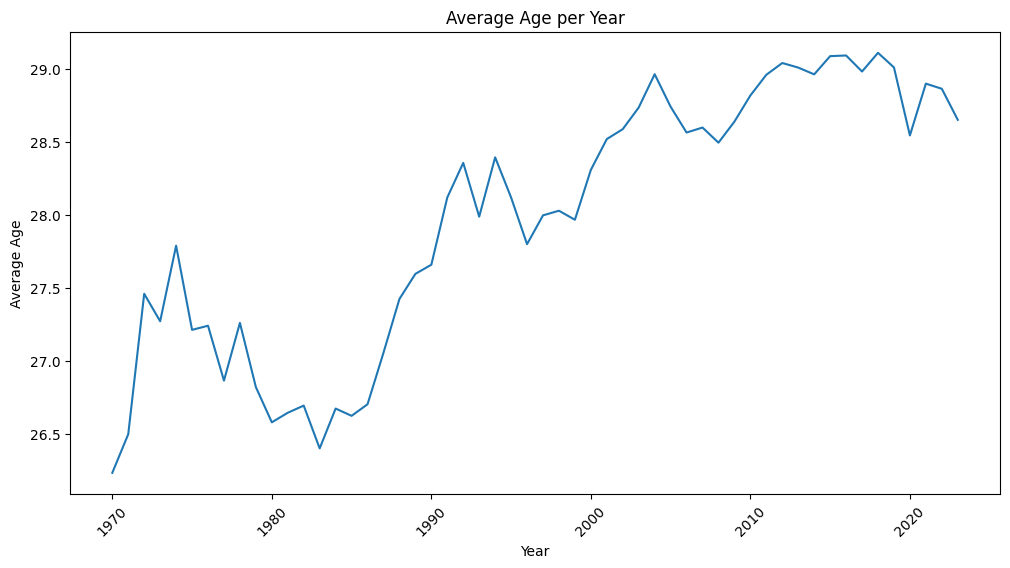

In [1991]:
age_df = races_df[['_url', 'cyclist_age']].copy()
age_df.loc[:, 'year'] = age_df['_url'].str.extract(r'(\d{4})')

# Calculate the average for each stage
average_age_per_stage = age_df.groupby('_url')['cyclist_age'].mean().reset_index()
age_df = age_df.merge(average_age_per_stage, on='_url', suffixes=('', '_average'))

# Calculate the average age for each year
average_age_per_year = age_df.groupby('year')['cyclist_age'].mean()


# Plot the average age per year with increased scale on x-axis
plt.figure(figsize=(12, 6))
average_age_per_year.plot(kind='line')
plt.title('Average Age per Year')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

Since we have an entry for each cyclist in a stage, we expect that the ```profile``` of the stage is the same for all the cyclists. This can cause the fact that each race will contribute in a weighted way (weighted w.r.t. the number of cyclist in each stage) to the overall statistics. So we caculate a dataframe where we keep only one entry for each stage.

In [1992]:
min_year = average_age_per_year.idxmin()
max_year = average_age_per_year.idxmax()
average_age_per_races = age_df.groupby('_url')['cyclist_age'].mean().mean() # two times mean to obtain the final average

print(f"Average age per races: {average_age_per_races}")
print(f"Year with minimum average age: {min_year}")
print(f"Year with maximum average age: {max_year}")

Average age per races: 28.133170449933573
Year with minimum average age: 1970
Year with maximum average age: 2018


In [1993]:
age_df

,_url,cyclist_age,year,cyclist_age_average
0,tour-de-france/1978/stage-6,22.0,1978,27.283019
1,tour-de-france/1978/stage-6,27.0,1978,27.283019
2,tour-de-france/1978/stage-6,24.0,1978,27.283019
3,tour-de-france/1978/stage-6,30.0,1978,27.283019
4,tour-de-france/1978/stage-6,27.0,1978,27.283019
...,...,...,...,...
589860,giro-d-italia/2010/stage-1,25.0,2010,28.903553
589861,giro-d-italia/2010/stage-1,28.0,2010,28.903553
589862,giro-d-italia/2010/stage-1,24.0,2010,28.903553
589863,giro-d-italia/2010/stage-1,38.0,2010,28.903553


In [1994]:
year_1970 = age_df[age_df['year'] == '1970'].dropna(subset=['cyclist_age_average'])
year_2018 = age_df[age_df['year'] == '2018'].dropna(subset=['cyclist_age_average'])

print(f"Number of races in 1970: {len(year_1970)}, number of races in 2018: {len(year_2018)}")

Number of races in 1970: 623, number of races in 2018: 18392


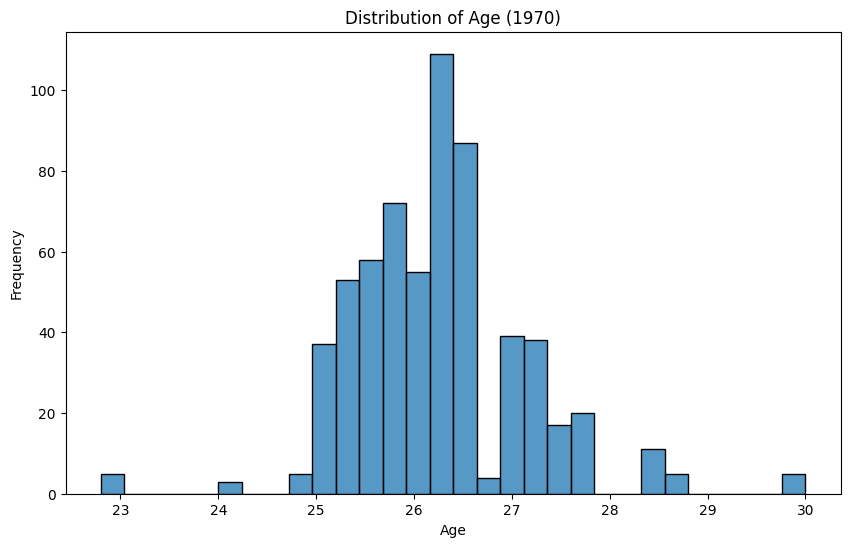

In [1995]:
plt.figure(figsize=(10, 6))
sns.histplot(year_1970['cyclist_age_average'], bins=30, kde=False)
plt.title('Distribution of Age (1970)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

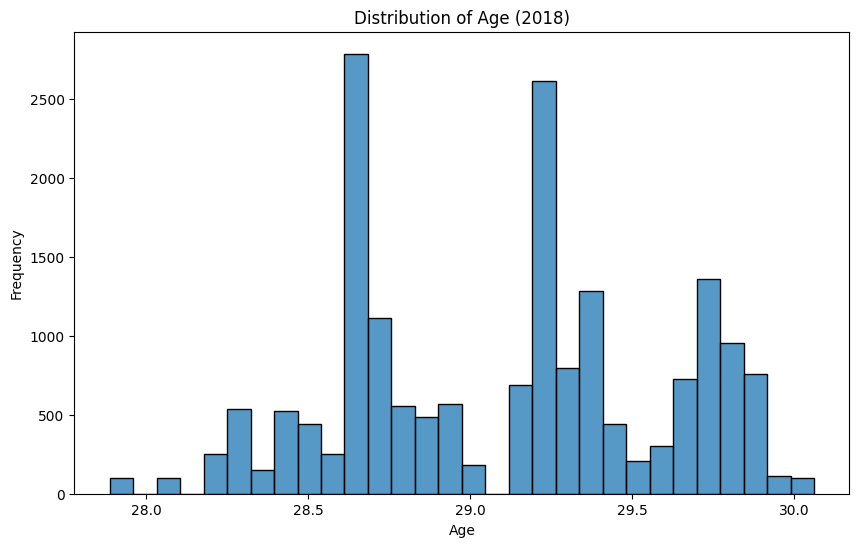

In [1996]:
plt.figure(figsize=(10, 6))
sns.histplot(year_2018['cyclist_age_average'], bins=30, kde=False)
plt.title('Distribution of Age (2018)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The plot shows that the average age of cyclists has increased over time both with the fact that the number of races in the dataset is greater for the recent years. In fact the lower peak is in 1970 (with a participants age around 26) which has only 623 races recorded in the dataset.  On the contrary the max peak not only has a higher average age but also a higher number of races in the dataset. In general, we can notice that the participant age has increased over the years.

#### ```is_tarmac``` column

This is a boolean column. We check the presence of null values, errors, and we plot the distribution of the True and False values.

Check if the value tarmac is consistent within the same stage.

In [1997]:
tarmac_consistency = races_df.groupby('_url')['is_tarmac'].nunique()
# Filter the groups where the number of unique 'profile' values is greater than 1
inconsistent_tarmac = tarmac_consistency[tarmac_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'is_tarmac' values:", len(inconsistent_tarmac))

Number of inconsistent 'is_tarmac' values: 0


In [1998]:
# Group by '_url' and select the first non-null value for 'startlist_quality'
is_tarmac_df = races_df.groupby('_url')['is_tarmac'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

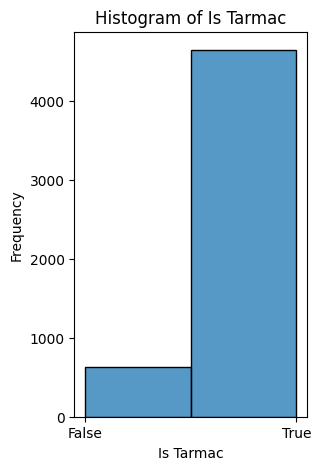

In [1999]:
plt.figure(figsize=(3, 5))
sns.histplot(is_tarmac_df['is_tarmac'], bins=2)
plt.title('Histogram of Is Tarmac')
plt.xlabel('Is Tarmac')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

There is a prevalence of tarmac stages over the non-tarmac ones.

#### ```is_cobbled``` column

Check the null values.

In [2000]:
# counting null values in is_cobbled column
int(races_df['is_cobbled'].isnull().sum())

0

In [2001]:
# unique values in is_cobbled column
races_df['is_cobbled'].value_counts()

is_cobbled
False    589865
Name: count, dtype: int64

There are only False values for this column.

#### ```is_gravel``` column

We check the presence of null values.

In [2002]:
#counting null values in is_gravel column
int(races_df['is_gravel'].isnull().sum())

0

In [2003]:
races_df['is_gravel'].value_counts()

is_gravel
False    589865
Name: count, dtype: int64

Same as before, there are only False values for this column.

#### ```cyclist_team``` column

Check the presence of null values.

In [2004]:
#counting null values in cyclist_team column
int(races_df['cyclist_team'].isnull().sum())

159161

We now count how many different teams are in the dataset.

In [2005]:
print(f"Number of different teams: {races_df['cyclist_team'].nunique()}")

Number of different teams: 91


Check whether any cyclist has raced for several teams in his career. Then count them.

In [2006]:
# Check groupin by cyclist and aggregating the unique teams
cyclist_teams = races_df.groupby('cyclist')['cyclist_team'].unique().reset_index()
display(cyclist_teams.head(7))

# Filter cyclists who have raced for more than one team
cyclists_multiple_teams = cyclist_teams[cyclist_teams['cyclist_team'].apply(lambda x: len(x) > 1)]
print(f"Number of cyclists who have raced for more than one team: {len(cyclists_multiple_teams)}")

,cyclist,cyclist_team
0,aad-van-den-hoek,[nan]
1,aaron-gate,"[ireland-2005, c-a-1978]"
2,aaron-kemps,[nan]
3,aaron-olsen,[nan]
4,aaron-van-poucke,"[canada-1996, watney-avia-1972, kelme-costa-bl..."
5,aaron-verwilst,"[canada-1996, new-zealand-2020]"
6,aart-vierhouten,[nan]


Number of cyclists who have raced for more than one team: 2398


Counting number of unique cyclists for each team

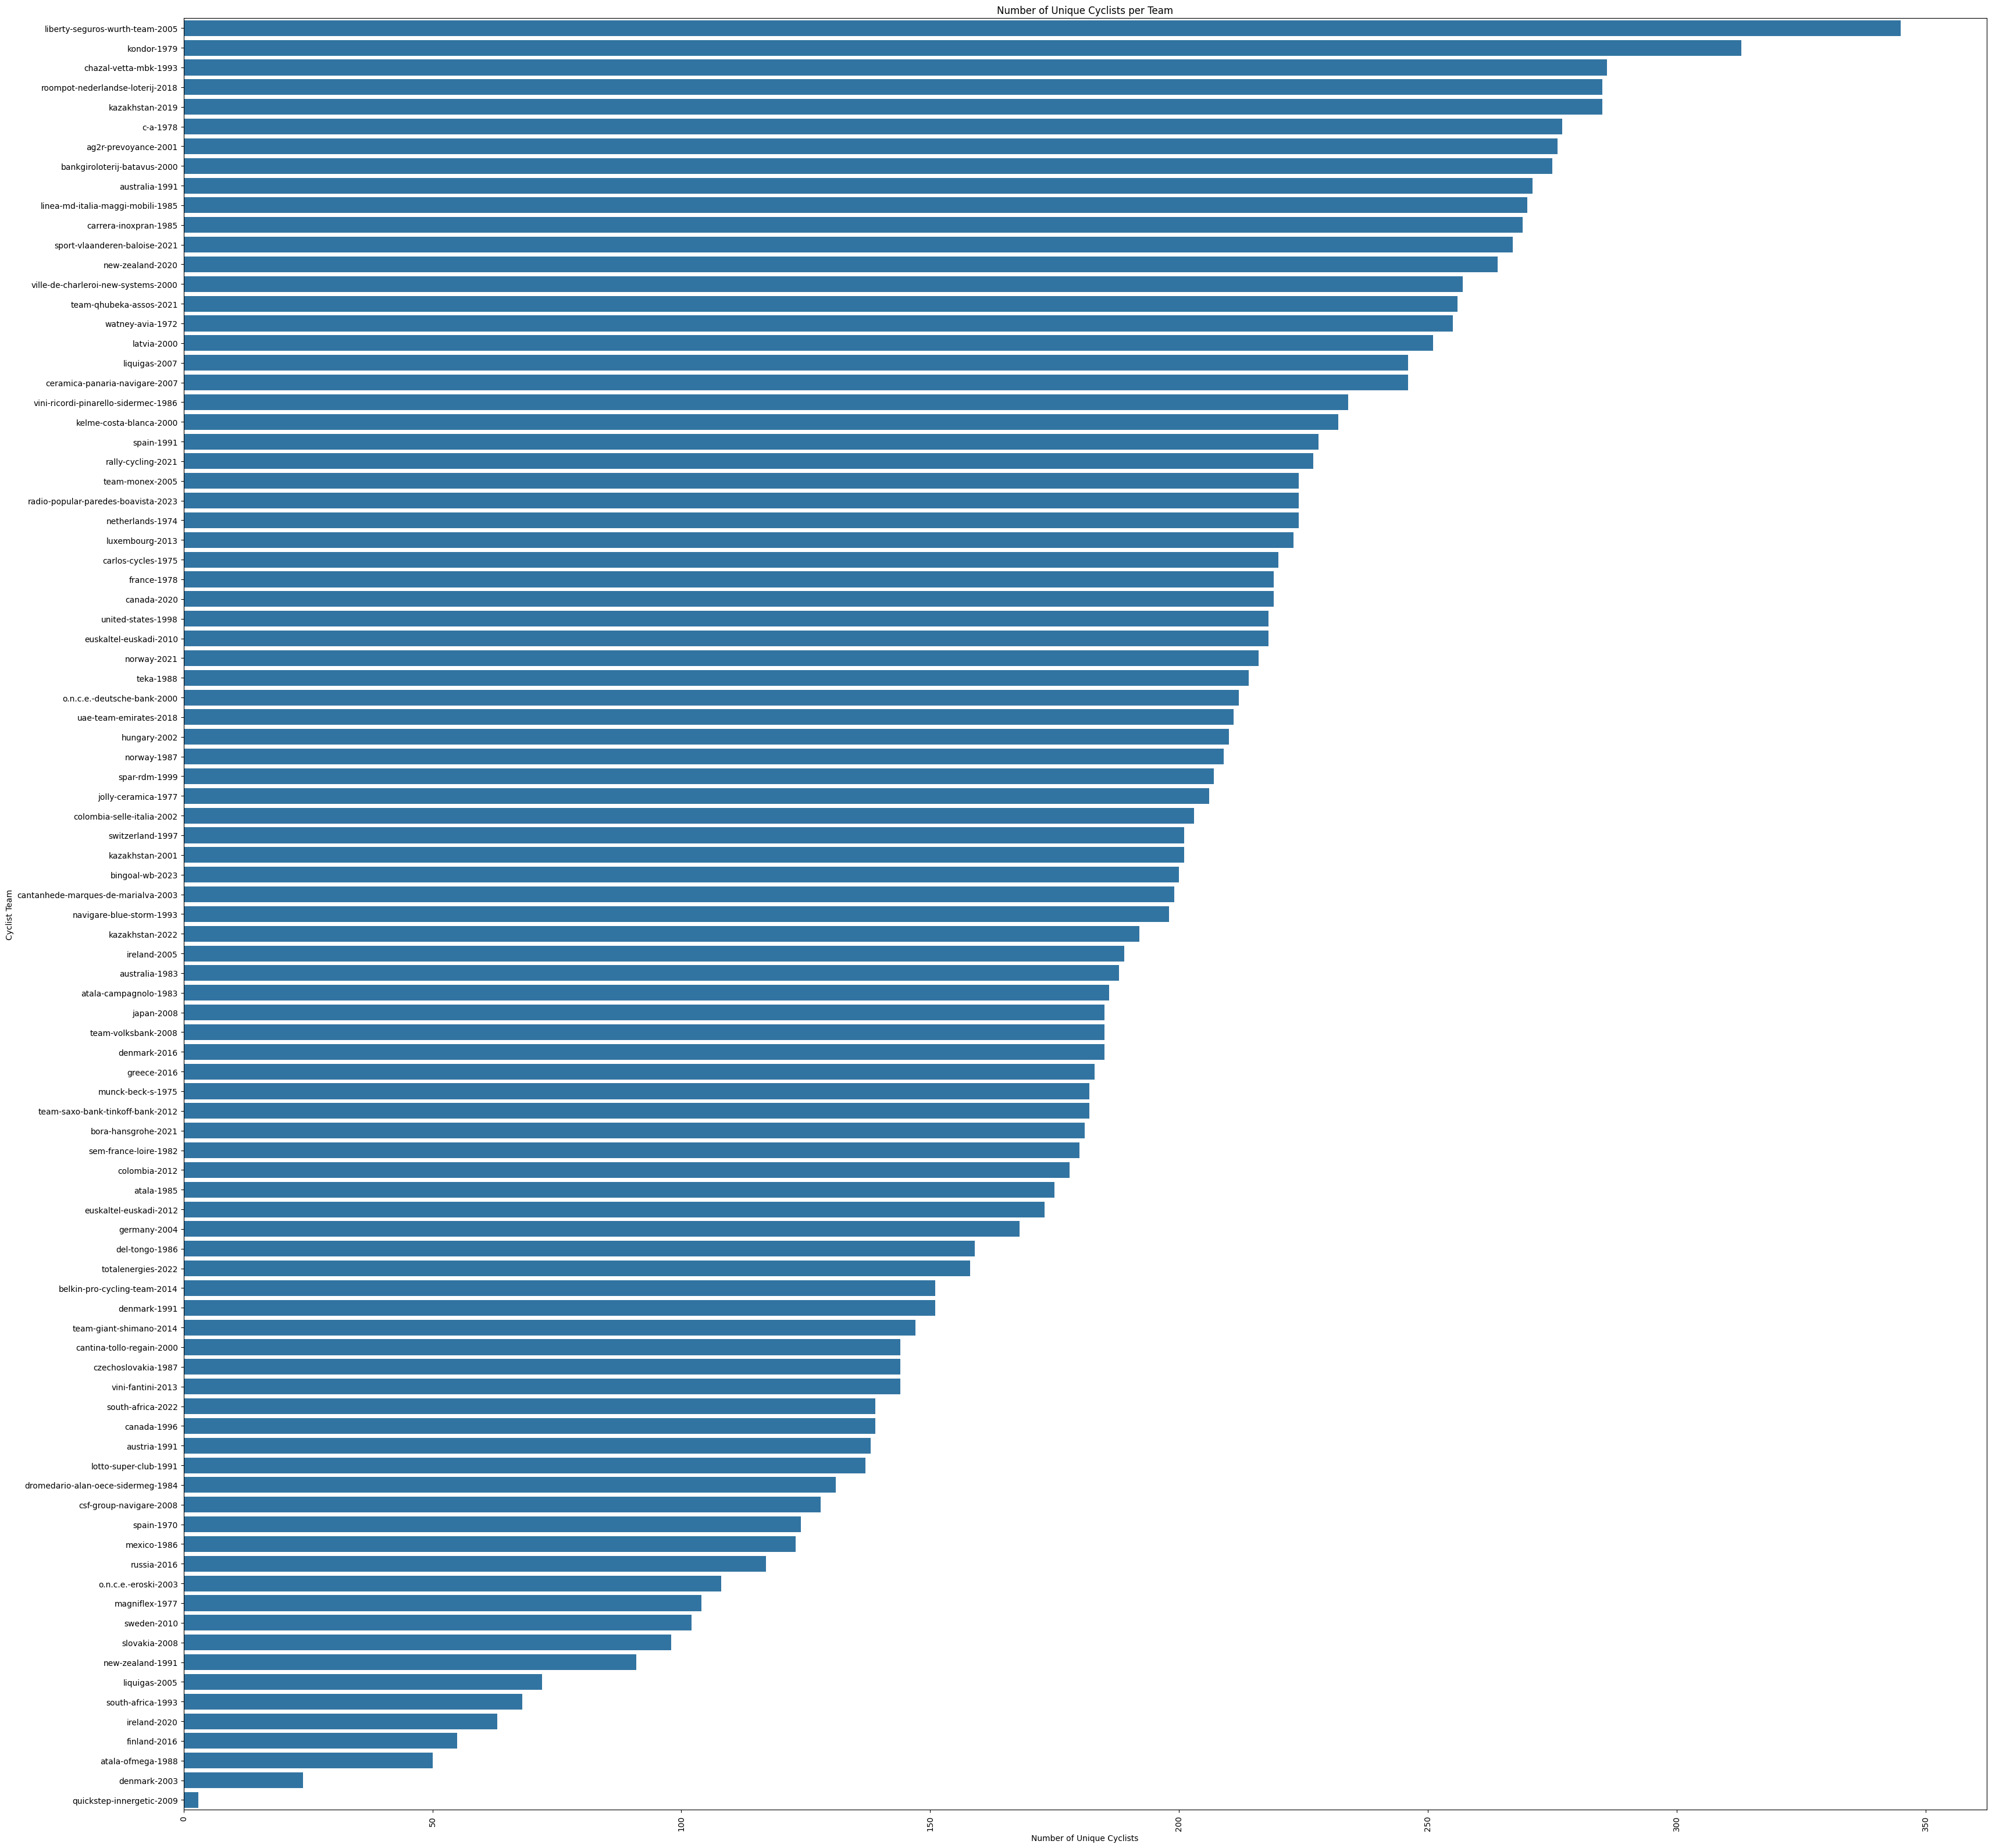

In [2007]:
unique_cyclists_df = races_df.drop_duplicates(subset=['cyclist_team', 'cyclist'])
unique_cyclists_per_team = unique_cyclists_df.groupby('cyclist_team')['cyclist'].nunique().reset_index()

# Plot the histogram with inverted x and y values
plt.figure(figsize=(40, 40))  # Increase the figure height for better readability
sns.barplot(y='cyclist_team', x='cyclist', data=unique_cyclists_per_team, order=unique_cyclists_per_team.sort_values('cyclist', ascending=False)['cyclist_team'])
plt.title('Number of Unique Cyclists per Team')
plt.ylabel('Cyclist Team')
plt.xlabel('Number of Unique Cyclists')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# open it in another tab to see the full size of the plot!

This plot shows that all teams has at least one cyclist. 

We finally check for incosistencies.

In [2008]:
# Group by '_url' and 'cyclist' and check the number of unique 'cyclist_team' values
team_inconsistencies = races_df.groupby(['_url', 'cyclist'])['cyclist_team'].nunique()
# Filter the groups with more than one unique 'cyclist_team' value
inconsistent_teams = team_inconsistencies[team_inconsistencies > 1]

# Display the inconsistent entries
print(f"Inconsistent cyclist_team values for the same race _url and cyclist id: {len(inconsistent_teams)}")

Inconsistent cyclist_team values for the same race _url and cyclist id: 0


#### ```delta``` column

We check for null values.

In [2009]:
#counting null values in delta column
int(races_df["delta"].isnull().sum())

0

In [2010]:
races_df["delta"].describe()

count    589865.000000
mean        418.292794
std         842.961596
min       -6906.000000
25%          10.000000
50%         156.000000
75%         624.000000
max       61547.000000
Name: delta, dtype: float64

Semantically, it is not correct for a cyclist to have a lower delta than a cyclist who finished ahead of him, since the delta is calculated by taking into account the difference between the finishing time of a given cyclist compared to the first-place finisher. 

First of all we check that cyclist are ordered based on the arrival positition.

In [2011]:
races_df.groupby('_url')['position'].is_monotonic_increasing.value_counts()

position
True    5281
Name: count, dtype: int64

After ensuring that for each unique ```_url``` in the dataset, the cyclists are sorted in ascending order by position, we check that the delta values are correctly calculated. We leave any intervention on outliers to the DP.

In [2012]:
# Create a temporary DataFrame to store the calculated delta values
from datetime import date


date_diff_df = pd.DataFrame()

# Add url to the DataFrame
date_diff_df['_url'] = races_df['_url']

# Convert the 'date' column to datetime if it is not already
date_diff_df['date'] = pd.to_datetime(races_df['date'])

# Add the delta values to the DataFrame
date_diff_df['delta'] = races_df['delta']

# Group by '_url', calculate the delta, convert it to seconds
date_diff_df['calculated_delta'] = date_diff_df.groupby('_url')['date'].transform(lambda x: (x - x.iloc[0]).dt.total_seconds())

# Verify if the calculated delta matches the existing delta
date_diff_df['delta_match'] = date_diff_df['delta'] == date_diff_df['calculated_delta']

date_diff_df['delta_match'].value_counts()




delta_match
True    589865
Name: count, dtype: int64

Each value in the ```delta``` column is correctly calculated with the respect to the datetime values in the ```date``` column. In an implicit way, this check also ensures that for the same arrival position is associated the same delta value.

Now we check that for the same stage, there will be increasing delta values.

In [2013]:
# For each URL, check if the corresponding delta value is greater or equal to the last greater value
def check_delta_greater_or_equal(group):
    last_greater_value = float('-inf')
    result = []
    for delta in group['delta']:
        if delta >= last_greater_value: # this ensues that the value is compared with the last greater value e.g [10.5, 1.5, 30.5, 25.5, 27.5, -40.5, 30.4],
            result.append(True)
            last_greater_value = delta
        else:
            result.append(False)
    return pd.DataFrame({'delta_check': result}, index=group.index)


delta_check_df = races_df.copy()
delta_check_df['delta_check'] = races_df.groupby('_url').apply(check_delta_greater_or_equal, include_groups=False).reset_index(level=0, drop=True)
delta_check_df['delta_check'].value_counts()


delta_check
True     586626
False      3239
Name: count, dtype: int64

In [2014]:
len(races_df.groupby('_url')) # how many unique urls are there

5281

In [2015]:
races_df.groupby('_url')['delta'].is_monotonic_increasing.value_counts()

delta
True     4935
False     346
Name: count, dtype: int64

Using this two checks we can see that there are 3239 wrong calculated deltas and on the total of 5281 different stages, 346 have at least one wrong delta value.

##### Plots

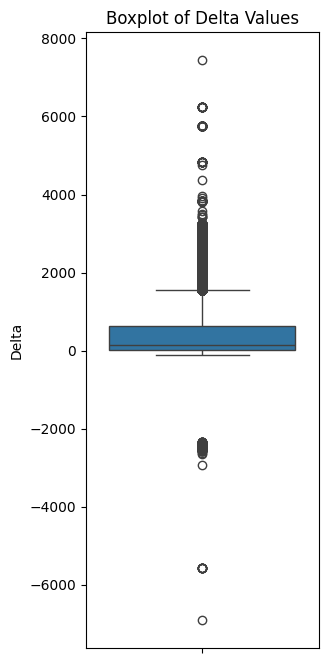

In [2016]:
delta_races = races_df[races_df['delta'] <= 10000]

plt.figure(figsize=(3, 8))
sns.boxplot(y=delta_races['delta'].dropna())
plt.title('Boxplot of Delta Values')
plt.ylabel('Delta')
plt.show()


This row seems to be very noisy, containing negative values (that are not allowed for a delta value that represent how many seconds after the first-placed the cyclist get to the finish). Also to visualize something in the plot value greater then 10k are dropped in the plot so there are very very high value for delta that are very strange for professional races.

Count number of outliers using IQR method

In [2017]:
count_outliers(races_df['delta'])

Number of outliers: 33234 over 589865 values using the IQR method


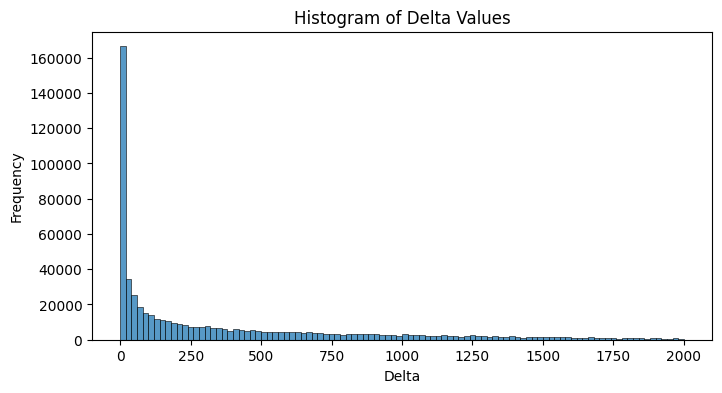

In [ ]:
# try to visualize distribution removing some outliers
delta_races = races_df[(races_df['delta'] <= 2000) & (races_df['delta'] >= 0)]

plt.figure(figsize=(8, 4))
sns.histplot(delta_races['delta'].dropna(), bins=100)
plt.title('Histogram of Delta Values')
plt.xlabel('Delta')
plt.ylabel('Frequency')
plt.show()



As we can see from the boxplot, there are a lot of negative values (and, more in general, outliers). To obtain a more clear view of the distribution of the delta values, we consider only the values berween 0 and 2000.
As we can expect, the little delta values are more frequent than the high ones since we can suppose that there are more cyclist that finish near the first one than the others.

### **Correlation Analysis**

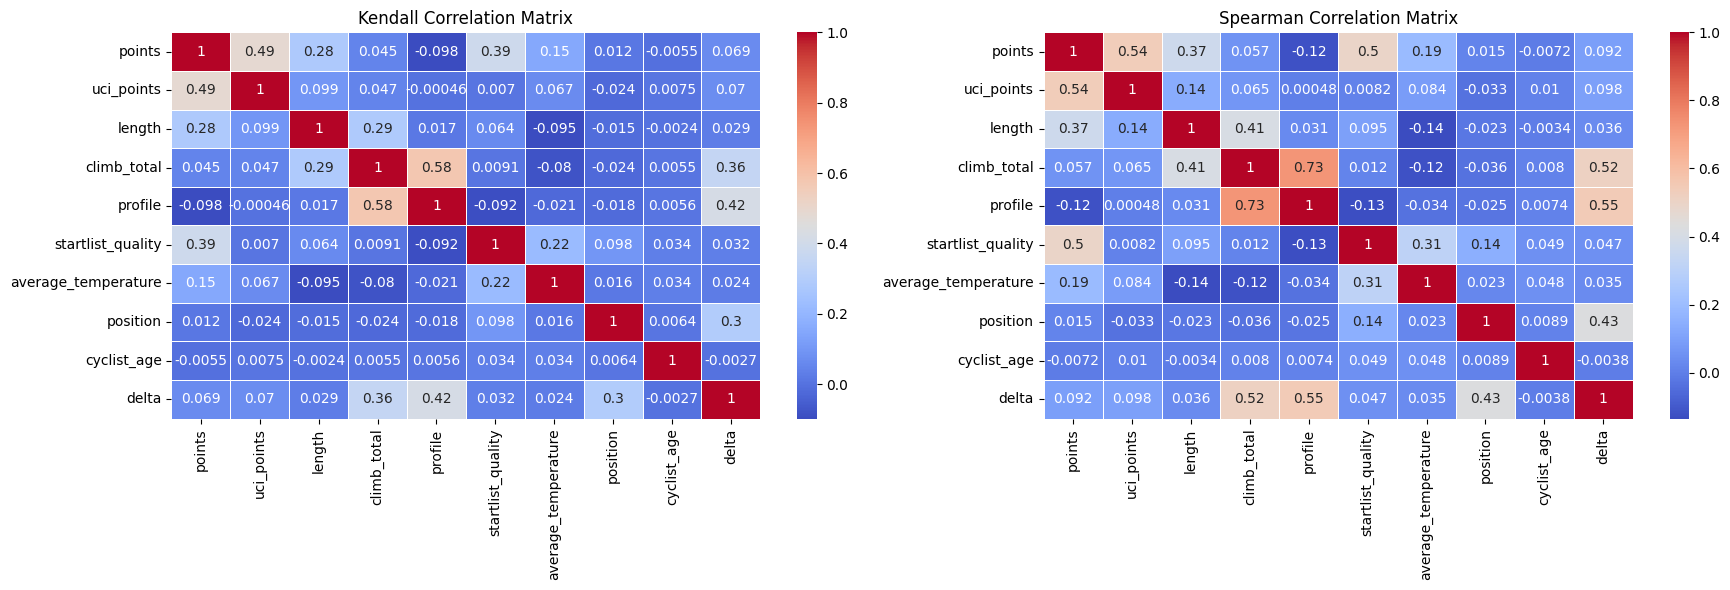

In [2019]:
from utils import center_and_scale, correlations, plot_correlations

normalized_races, normalization_scalers_races = center_and_scale(races_df)
races_corr = correlations(normalized_races, ["kendall", "spearman"])

plot_correlations(races_corr)

There are no big correlation between the numerical attributes with the exception of ```climb_total``` and ```profile``` which is expected since they are different numerical representation of the same concept (i.e. race difficulty in terms of route characteristics).

# Data Integration

Some data understanding analysis for merged datasets

#### Checking if there are cyclists that not appear in races or vice versa

In [2020]:
# Elements in 'cyclist' column of races_data and not in '_url' column of cyclists_data
diff_races_not_in_cyclists = np.setdiff1d(races_df['cyclist'].unique(), cyclists_df['_url'].unique())
print("In 'races_data' but not in 'cyclists_data':", diff_races_not_in_cyclists)

# Elements in '_url' column of cyclists_data and not in 'cyclist' column of races_data
diff_cyclists_not_in_races = np.setdiff1d(cyclists_df['_url'].unique(), races_df['cyclist'].unique())
print("In 'cyclists_data' but not in 'races_data':", diff_cyclists_not_in_races)

print(races_df['cyclist'].unique().size)

len(diff_cyclists_not_in_races)

In 'races_data' but not in 'cyclists_data': []
In 'cyclists_data' but not in 'races_data': ['arturo-gravalos-lopez' 'bas-tietema' 'benjamin-levecot'
 'christian-mager' 'christophe-premont' 'dorian-de-maeght'
 'eddy-torrekens' 'eric-schoefs' 'flavio-cardoso' 'franck-morelle'
 'gert-van-brabant' 'gianluca-maggiore' 'gino-primo' 'hiroki-nishimura'
 'jean-michel-thilloy' 'jeanot-deriemaecker' 'koen-hullebusch'
 'kurt-van-landeghem' 'lenaic-olivier' 'luca-braidot' 'marat-ganeev'
 'martin-gilbert' 'matteo-di-serafino' 'mattia-bevilacqua' 'mattia-viel'
 'morten-hegreberg' 'nicolas-liboreau' 'oleg-grishkine' 'olivier-matthys'
 'pascal-duez' 'peter-spaenhoven' 'philipp-ludescher' 'raphael-pires'
 'rik-claeys' 'rikkie-matthijssens' 'roman-bronis'
 'sergio-garcia-gonzalez' 'silvere-ackermann' 'tanner-putt']
6095


39

#### Checking if cyclist age column is aligned with cyclist birth year using the stage date

In [2021]:
from datetime import datetime

def extract_year(date):
    """ extract the year from a date string """
    try:
        return pd.to_datetime(date).dt.year
    except ValueError:
        return np.nan

# Drop rows with NaN values in 'date', 'cyclist_age' and 'birth_year' columns
races_df_clean = races_df.dropna(subset=['date', 'cyclist_age'])
cyclists_df_clean = cyclists_df.dropna(subset=['birth_year'])

# Merge the two dataframes on the 'cyclist' and '_url' columns
merged_df_clean = races_df_clean.merge(cyclists_df_clean, left_on='cyclist', right_on='_url', suffixes=('_race', '_cyclist'))

# Calculate the birth year from the 'date' and 'cyclist_age' columns
merged_df_clean['calculated_birth_year'] = extract_year(merged_df_clean['date']) - merged_df_clean['cyclist_age']

# Filter the rows where the calculated birth year does not match the actual birth year
wrong_age_clean = merged_df_clean[merged_df_clean['calculated_birth_year'] != merged_df_clean['birth_year']]

# Display the 'wrong_age' dataframe
print(f"Number of cyclists with wrong age in ne of the datasets: {len(wrong_age_clean)}")

Number of cyclists with wrong age in ne of the datasets: 0
